# Airbnb  Business Analysis 

## Loading libraries

In [639]:
# Loading libraries for data analysis.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import normalize

## Loading Files

In [640]:
# Set with web sessions log data for users
sessions=pd.read_csv('../JUPYTER_TMP/Data/Final/sessions.csv')

In [641]:
# Main Set with representative sample data of new users
train=pd.read_csv(
                    filepath_or_buffer='../JUPYTER_TMP/Data/Final/train_users_2.csv',
                    parse_dates=['date_account_created','timestamp_first_active','date_first_booking'])

In [642]:
## summary statistics of users' age group,gender, country of destination                                                  
age=pd.read_csv('../JUPYTER_TMP/Data/Final/age_gender_bkts.csv')                                        

## Data preview

In [643]:
# Preview sessions Table
sessions.head(2)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0


In [644]:
# Preview train Table
train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [645]:
# Preview age Table
age.head(2)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0


## Data Information

In [646]:
# Data type information of sessions Table
print(sessions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB
None


In [647]:
# Data type information of train Table
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null datetime64[ns]
timestamp_first_active     213451 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: datetime64[ns](3), float64(1), int64(1), object(11)
memory

In [648]:
# Data type information of age Table
print(age.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB
None


##  Analysis by age groups

In [649]:
## Calculate % of never booking users
never_booking=(len(train)-train['date_first_booking'].count())/len(train)*100
print(f'The percent of users that never booking is {round(never_booking,2)}% from total new users')

The percent of users that never booking is 58.35% from total new users


Next step we check this rate according age group

In [650]:
# Creating groups by age group
train['age_group']=train['age'].apply(lambda x: '15-24' if 15<=x<25    # group age column creating
                                           else '25-34' if 25<=x<35
                                           else '35-44' if 35<=x<45
                                           else '45-54' if 45<=x<55
                                           else '55-64' if 55<=x<65
                                           else '65+'   if 65<=x<=85
                                           else 'n/a')
##Note: According to Airbnb practices, only an 18-year-old person can open an account.
    #In contrast, a company does not require age pre-registration and it is possible that 15 to 18 year olds 
     #can also place an order on their own. Therefore, for research:
        #all customers who did not specify their age or age below 15 are defined as N/A.
        #all customers who did not specify their age or age more 85 are defined as N/A.

In [651]:
i=len(train[train['age_group']=='n/a'])
print(f'The number new users without age is {i}') #number users without age setting
print(f'The percent new users without age is {round(i/len(train),3)*100}%') #percent users without age setting

The number new users without age is 90691
The percent new users without age is 42.5%


In [652]:
## Create users table with age group only
train_with_age=train[~(train['age_group']=='n/a')]
train_with_age.head(1) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-44


In [653]:
# Grouping by age groups
count_booking_by_age=train_with_age.groupby('age_group')[['id','date_first_booking']].count()\
.rename(columns={'id':'total_users','date_first_booking':'number_booked_users'})
# Adding users rate from total users by each age group column
count_booking_by_age['users_rate_from_total_users']=round(count_booking_by_age['total_users']/len(train_with_age),2)
# Adding percentege orders from total orders by each age group column
count_booking_by_age['booked_rate_from_total_users']=\
                          round(count_booking_by_age['number_booked_users']/train_with_age['date_first_booking'].count(),2)
count_booking_by_age

,total_users,number_booked_users,users_rate_from_total_users,booked_rate_from_total_users
age_group,,,,
15-24,10778,5428,0.09,0.08
25-34,55694,32054,0.45,0.48
35-44,30759,16834,0.25,0.25
45-54,14521,7149,0.12,0.11
55-64,7599,3904,0.06,0.06
65+,3409,1743,0.03,0.03


In [654]:
# calculate booked rate by age groups
age_booking_rate=count_booking_by_age.assign(booked_rate_in_age_group=round(count_booking_by_age['number_booked_users']\
                                              /count_booking_by_age['total_users'],2))
age_booking_rate=age_booking_rate[['users_rate_from_total_users','booked_rate_from_total_users','booked_rate_in_age_group']]
age_booking_rate
#users_rate_from_total_users--> show the percent age group users from total users.
#booked_rate_from_total_users--> show how many orders booked  certain age group from the total orders.
#booked_rate--> show percentage who make a first booking within an age group.

,users_rate_from_total_users,booked_rate_from_total_users,booked_rate_in_age_group
age_group,,,
15-24,0.09,0.08,0.50
25-34,0.45,0.48,0.58
35-44,0.25,0.25,0.55
45-54,0.12,0.11,0.49
55-64,0.06,0.06,0.51
65+,0.03,0.03,0.51


In [655]:
# Using "age" the table to get data on a total population in USA
 #will not take age groups under 15 age for research.
mask=(age['country_destination']=='US')&(~age['age_bucket'].isin(['0-4','5-9','10-14']))
age_usa=age[mask]
age_usa=age_usa.assign(age_group=age_usa['age_bucket']\
.apply(lambda x : '15-24' if x in (['15-19','20-24'])                  #distribution into age groups
             else '25-34' if x in (['25-29','30-34'])
             else '35-44' if x in (['35-39','40-44'])
             else '45-54' if x in (['45-49','50-54'])
             else '55-64' if x in (['55-59','60-64'])
             else '65+'))
age_usa.head()

,age_bucket,country_destination,gender,population_in_thousands,year,age_group
378,90-94,US,female,1193.0,2015.0,65+
379,75-79,US,male,3641.0,2015.0,65+
380,70-74,US,male,5278.0,2015.0,65+
381,65-69,US,male,7561.0,2015.0,65+
382,60-64,US,male,9217.0,2015.0,55-64


In [656]:
# grouping by age group and calculating percentage of total study population
age_usa_group=age_usa.groupby('age_group')['population_in_thousands'].sum().to_frame()
age_usa_group=age_usa_group.assign(rate_of_total_study_population=age_usa_group['population_in_thousands']\
                    .apply(lambda x:round(x/(age_usa_group['population_in_thousands'].sum()),2)))
age_usa_group=age_usa_group['rate_of_total_study_population'].to_frame()
age_usa_group

,rate_of_total_study_population
age_group,
15-24,0.17
25-34,0.17
35-44,0.16
45-54,0.17
55-64,0.16
65+,0.18


In [657]:
#join 'age_booking_rate' table with 'age_usa_group' table 
age_summary_tbl=age_booking_rate.merge(age_usa_group,how='left',left_on='age_group',right_on='age_group')
age_summary_tbl
#columns:
    #users_rate_from_total_users--> show the percent age group users from total users.
    #booked_rate_from_total_users--> show how many orders booked  certain age group from the total orders.
    #booked_rate_in_age_group--> show percentage who make a first booking within an age group.
    #rate_of_total_study_population--> percentage of total study population in USA.

,users_rate_from_total_users,booked_rate_from_total_users,booked_rate_in_age_group,rate_of_total_study_population
age_group,,,,
15-24,0.09,0.08,0.50,0.17
25-34,0.45,0.48,0.58,0.17
35-44,0.25,0.25,0.55,0.16
45-54,0.12,0.11,0.49,0.17
55-64,0.06,0.06,0.51,0.16
65+,0.03,0.03,0.51,0.18


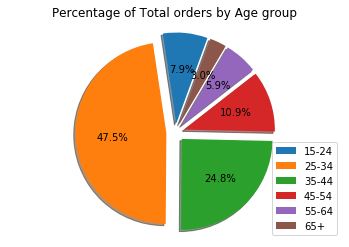

In [658]:
# Pie chart Percentage of Total orders by Age group
p_size = age_summary_tbl['booked_rate_from_total_users']
p_labels = age_summary_tbl.index

plt.pie(p_size, startangle=70, explode = (0.1, 0.1, 0.1,0.1,0.1,0.1),autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Total orders by Age group')
plt.axis('equal')
plt.legend(p_labels)
plt.show()

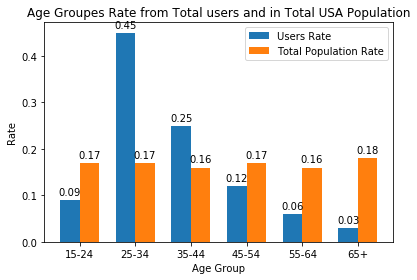

In [659]:
# Bar chart Age Groupes Rate from Total users and in Total USA Population
labels = age_summary_tbl.index
Users = age_summary_tbl['users_rate_from_total_users']
Population = age_summary_tbl['rate_of_total_study_population']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-width/2, Users, width, label='Users Rate')
rects2 = ax.bar(x+width/2, Population, width, label='Total Population Rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rate')
ax.set_xlabel('Age Group')
ax.set_title('Age Groupes Rate from Total users and in Total USA Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=1)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

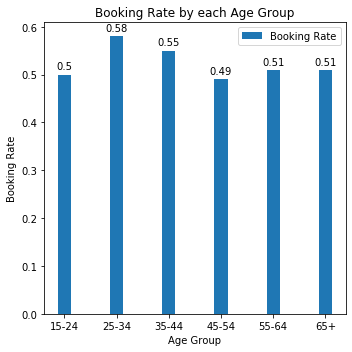

In [660]:
# Bar chart Booking Rate in each Age Group
labels = age_summary_tbl.index
Booking_rate=age_summary_tbl['booked_rate_in_age_group']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(5,5))
rects1 = ax.bar(x , Booking_rate, width, label='Booking Rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Booking Rate')
ax.set_xlabel('Age Group')
ax.set_title('Booking Rate by each Age Group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=1)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

### Country destination by age 

In [661]:
# Creating table to analize booking destination of ech age group
mask=train_with_age['country_destination']=='NDF'
age_country=train_with_age[~mask][['age_group','country_destination','id']]
age_country.head(2)

,age_group,country_destination,id
2,55-64,US,4ft3gnwmtx
3,35-44,other,bjjt8pjhuk


In [662]:
# Total orders by each age group
age_group_total_orders=age_country.groupby('age_group')['country_destination'].count().to_frame()\
.rename(columns={'country_destination':'total_orders'})
age_group_total_orders  

,total_orders
age_group,
15-24,5428
25-34,32054
35-44,16834
45-54,7149
55-64,3904
65+,1743


In [663]:
# Making a pivot table number orders for each country by age groups.
age_country_pvt=age_country.pivot_table(index='age_group',columns='country_destination',
                                        values='id',aggfunc='count')
age_country_pvt 

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
age_group,,,,,,,,,,,
15-24,25,73,82,238,364,173,238,77,16,3527,615
25-34,187,467,371,766,1503,678,829,256,78,23444,3475
35-44,124,292,207,384,932,427,475,147,32,11895,1919
45-54,54,133,86,162,474,229,233,51,13,4968,746
55-64,27,62,57,83,243,154,131,38,13,2657,439
65+,11,27,30,40,134,73,77,20,4,1123,204


In [664]:
#Join tables total orders by age group and orders to each country by age group.
age_country_total_pvt=age_country_pvt.merge(age_group_total_orders,how='inner',left_on='age_group',right_on='age_group')
age_country_total_pvt 

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other,total_orders
age_group,,,,,,,,,,,,
15-24,25,73,82,238,364,173,238,77,16,3527,615,5428
25-34,187,467,371,766,1503,678,829,256,78,23444,3475,32054
35-44,124,292,207,384,932,427,475,147,32,11895,1919,16834
45-54,54,133,86,162,474,229,233,51,13,4968,746,7149
55-64,27,62,57,83,243,154,131,38,13,2657,439,3904
65+,11,27,30,40,134,73,77,20,4,1123,204,1743


In [665]:
# Find percent orders to each country from total orders by each age group
age_country_total_pvt[['AU','CA','DE','ES','FR','GB','IT','NL','PT','US','other']]\
=normalize(age_country_total_pvt[['AU','CA','DE','ES','FR','GB','IT','NL','PT','US','other']], axis=1, norm="l1")

In [666]:
# Preferences can now be clearly seen
age_country_rates=age_country_total_pvt[['AU','CA','DE','ES','FR','GB','IT','NL','PT','US','other']]
age_country_rates 

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
age_group,,,,,,,,,,,
15-24,0.004606,0.013449,0.015107,0.043847,0.067060,0.031872,0.043847,0.014186,0.002948,0.649779,0.113301
25-34,0.005834,0.014569,0.011574,0.023897,0.046890,0.021152,0.025863,0.007987,0.002433,0.731391,0.108411
35-44,0.007366,0.017346,0.012297,0.022811,0.055364,0.025365,0.028217,0.008732,0.001901,0.706606,0.113995
45-54,0.007554,0.018604,0.012030,0.022661,0.066303,0.032032,0.032592,0.007134,0.001818,0.694922,0.104350
55-64,0.006916,0.015881,0.014600,0.021260,0.062244,0.039447,0.033555,0.009734,0.003330,0.680584,0.112449
65+,0.006311,0.015491,0.017212,0.022949,0.076879,0.041882,0.044177,0.011474,0.002295,0.644291,0.117040


In [667]:
# Before rank results will make unpivot table 
age_country_rates_upvt=age_country_rates.reset_index().melt(id_vars='age_group',
                                    value_vars=age_country_rates.columns,
                                    var_name='country',
                                    value_name='rate')
age_country_rates_upvt.head(2)

,age_group,country,rate
0,15-24,AU,0.004606
1,25-34,AU,0.005834


In [668]:
# Rank by booking rate  to each country by each age group.
rnk=age_country_rates_upvt.groupby('age_group')['rate'].rank(method='min',ascending=False)
age_country_rates_upvt_rnk=age_country_rates_upvt\
.assign(rate_rank=rnk)\
.sort_values(['age_group','rate'],ascending=[True,False])  
age_country_rates_upvt_rnk.head(1)

,age_group,country,rate,rate_rank
54,15-24,US,0.649779,1.0


In [669]:
# Round rate column.
age_country_rates_upvt_rnk['rate']=round(age_country_rates_upvt_rnk['rate'],2)

In [670]:
age_country_rates_upvt_rnk.head(1)

,age_group,country,rate,rate_rank
54,15-24,US,0.65,1.0


In [671]:
# Top country destination by booking rate in each Age group.
top_countries=age_country_rates_upvt_rnk[age_country_rates_upvt_rnk['rate_rank']<=1][['age_group','country','rate']]\
.set_index('age_group')
top_countries

,country,rate
age_group,,
15-24,US,0.65
25-34,US,0.73
35-44,US,0.71
45-54,US,0.69
55-64,US,0.68
65+,US,0.64


In [672]:
# Because in each group the USA is more than 60% of total booking rate, will check other destinations without US.
 # Top 2 country destination by booking rate in each Age group.
top_countries_2=age_country_rates_upvt_rnk[age_country_rates_upvt_rnk['rate_rank']==2][['age_group','country','rate']]\
.set_index('age_group')
top_countries_2

,country,rate
age_group,,
15-24,other,0.11
25-34,other,0.11
35-44,other,0.11
45-54,other,0.10
55-64,other,0.11
65+,other,0.12


In [673]:
# Top 3 country destination by booking rate in each Age group.
top_countries_3=age_country_rates_upvt_rnk[age_country_rates_upvt_rnk['rate_rank']==3][['age_group','country','rate']]\
.set_index('age_group')
top_countries_3

,country,rate
age_group,,
15-24,FR,0.07
25-34,FR,0.05
35-44,FR,0.06
45-54,FR,0.07
55-64,FR,0.06
65+,FR,0.08


## Analysis by gender

In [674]:
# Calculate percentage of users without sex definition
mask=(train['gender']=='-unknown-')|(train['gender']=='OTHER')
i=train[mask]['gender'].count()/len(train)
print(f'Percentage of users without sex definition is {round((i),4)*100}%')

Percentage of users without sex definition is 44.96%


In [675]:
# Filtering to create users table with  gender settings only.
mask=(train['gender']=='-unknown-')|(train['gender']=='OTHER')
male_female_users=len(train[~mask])
train_male_female=train[~mask].groupby('gender')['id'].count().to_frame()\
.rename(columns={'id':'Number users'})
train_male_female  

,Number users
gender,
FEMALE,63041
MALE,54440


In [676]:
# Percentage of women and men.(only users with gender settings)
train_male_female_pct=(train_male_female['Number users']/male_female_users).to_frame()
train_male_female_pct 

,Number users
gender,
FEMALE,0.536606
MALE,0.463394


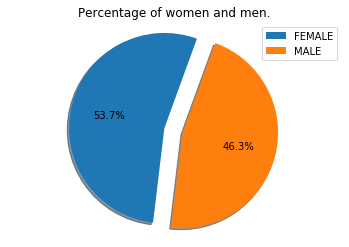

In [677]:
# Pie chart percentage of women and men.
p_size = train_male_female_pct['Number users']
p_labels = train_male_female_pct.index

plt.pie(p_size, startangle=70, explode = (0.1, 0.1),autopct='%1.1f%%', shadow=True)
plt.title('Percentage of women and men.')
plt.axis('equal')
plt.legend(p_labels)
plt.show()

In [678]:
# create table with total users and ordered users by gender.
mask=(train['gender']=='-unknown-')|(train['gender']=='OTHER')
train_gender_only=train[~mask]
gender_orders=train_gender_only.groupby('gender')[['id','date_first_booking']].count()\
.rename(columns={'id':'total','date_first_booking':'ordered'})
gender_orders

,total,ordered
gender,,
FEMALE,63041,31993
MALE,54440,27721


In [679]:
# Calculate booking rate by gender.
gender_orders['pct_booking']=gender_orders['ordered']/gender_orders['total']

In [680]:
gender_orders 

,total,ordered,pct_booking
gender,,,
FEMALE,63041,31993,0.507495
MALE,54440,27721,0.509203


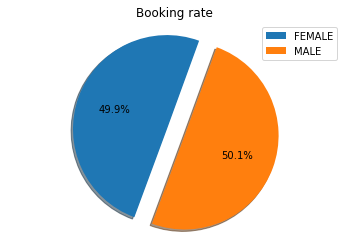

In [681]:
# Pie chart booking rate by gender.
p_size = gender_orders['pct_booking']
p_labels = gender_orders.index

plt.pie(p_size, startangle=70, explode = (0.1, 0.1),autopct='%1.1f%%', shadow=True)
plt.title('Booking rate')
plt.axis('equal')
plt.legend(p_labels)
plt.show()

In [682]:
# Total orders by age and country destination.
train_gender_only=train_gender_only[~(train_gender_only['country_destination']=='NDF')]
train_gender_only_pvt=train_gender_only.pivot_table(index='gender',columns='country_destination',values='id',aggfunc='count')
train_gender_only_pvt

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
gender,,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,278,69,19457,3443


In [683]:
# Join to add 'total' column
train_gender_only_pvt=train_gender_only_pvt.merge(gender_orders['ordered'],how='inner',left_on='gender',right_on='gender')\
.rename(columns={'ordered':'total'}) # join to make table with 'total' column
train_gender_only_pvt

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other,total
gender,,,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,254,78,22694,3160,31993
MALE,188,477,416,677,1335,682,699,278,69,19457,3443,27721


In [684]:
# Find percent orders to each country from total orders by each age group
train_gender_only_pvt[['AU','CA','DE','ES','FR','GB','IT','NL','PT','US','other']]\
=normalize(train_gender_only_pvt[['AU','CA','DE','ES','FR','GB','IT','NL','PT','US','other']], axis=1, norm="l1")

In [685]:
# Table with booking rate to each country by gender.
gender_country_rates=train_gender_only_pvt[['AU','CA','DE','ES','FR','GB','IT','NL','PT','US','other']]
gender_country_rates=gender_country_rates.transpose()
gender_country_rates

gender,FEMALE,MALE
AU,0.006470,0.006782
CA,0.014222,0.017207
DE,0.011190,0.015007
ES,0.026662,0.024422
FR,0.061326,0.048158
GB,0.027537,0.024602
IT,0.034101,0.025216
NL,0.007939,0.010028
PT,0.002438,0.002489
US,0.709343,0.701887


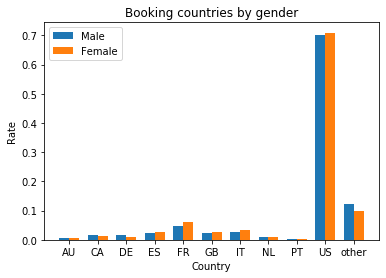

In [686]:
# Bar chart booking rate to each country by gender.
fig, ax = plt.subplots()
bar_width = 0.35
x_axis_labels = gender_country_rates.index
x_axis_1 = np.arange(len(x_axis_labels))
y_axis_1 = gender_country_rates['MALE']
y_axis_2 = gender_country_rates['FEMALE']
ax.bar(x_axis_1, y_axis_1,bar_width,label='Male')
ax.bar(x_axis_1+bar_width, y_axis_2,bar_width,label='Female')
ax.set_xticks(np.arange(len(x_axis_labels))+bar_width/2)
ax.set_xticklabels(x_axis_labels)
ax.set_ylabel('Rate')
ax.set_xlabel('Country')
ax.set_title('Booking countries by gender')
ax.legend()
plt.show()

### Gender and age drilldown

In [687]:
# Filtering to create users table with age and gender settings only.
mask1=~(train['age_group']=='n/a')
mask2=~((train['gender']=='-unknown-')|(train['gender']=='OTHER'))
train_age_gender=train[mask1&mask2]
train_age_gender.head(2)     

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-44
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-64


In [688]:
 # Pivot table with number users with gender settings by age group
train_age_gender_pvt=train_age_gender.pivot_table(index='age_group',columns='gender',values='id',aggfunc='count')
train_age_gender_pvt 

gender,FEMALE,MALE
age_group,,
15-24,5622,3578
25-34,26300,22492
35-44,13073,13515
45-54,6306,6178
55-64,3742,2744
65+,1549,1337


In [689]:
# Add total column.
train_age_gender_pvt['Total']=train_age_gender_pvt['FEMALE']+train_age_gender_pvt['MALE'] 

In [690]:
# Calculate percent and round from total.
train_age_gender_pvt['FEMALE']=round((train_age_gender_pvt['FEMALE']/train_age_gender_pvt['Total']),2)
train_age_gender_pvt['MALE']=round((train_age_gender_pvt['MALE']/train_age_gender_pvt['Total']),2)
train_age_gender_pvt

gender,FEMALE,MALE,Total
age_group,,,
15-24,0.61,0.39,9200
25-34,0.54,0.46,48792
35-44,0.49,0.51,26588
45-54,0.51,0.49,12484
55-64,0.58,0.42,6486
65+,0.54,0.46,2886


In [691]:
# Create table with gender rate by age group
train_age_gender_pvt=train_age_gender_pvt[['FEMALE','MALE']]
train_age_gender_pvt 

gender,FEMALE,MALE
age_group,,
15-24,0.61,0.39
25-34,0.54,0.46
35-44,0.49,0.51
45-54,0.51,0.49
55-64,0.58,0.42
65+,0.54,0.46


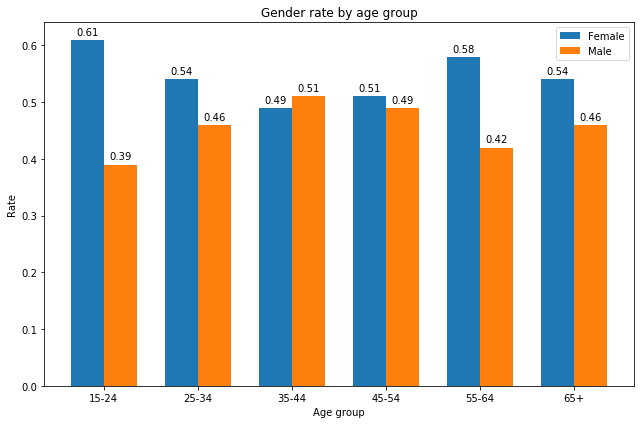

In [692]:
# Bar chart Users Rate in each Age Group by gender.
labels = train_age_gender_pvt.index
Female= train_age_gender_pvt['FEMALE']
Male = train_age_gender_pvt['MALE']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(9,6))
rects1 = ax.bar(x - width/2, Female, width, label='Female')
rects2 = ax.bar(x + width/2, Male, width, label='Male')
ax.set_ylabel('Rate')
ax.set_xlabel('Age group')
ax.set_title('Gender rate by age group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [693]:
# Create pivot table with number users with first booking by gender in each age group.
train_age_gender_pvt_2=train_age_gender.pivot_table(index='age_group',columns='gender',values='date_first_booking',
                                                    aggfunc='count')\
.rename(columns={'FEMALE':'Female_orders','MALE':'Male_orders'})
train_age_gender_pvt_2

gender,Female_orders,Male_orders
age_group,,
15-24,2766,1655
25-34,14663,12240
35-44,6730,7082
45-54,2824,2949
55-64,1783,1346
65+,722,670


In [694]:
# Create pivot table with total users by gender in each age group.
train_age_gender_pvt_1=train_age_gender.pivot_table(index='age_group',columns='gender',values='id',aggfunc='count')\
.rename(columns={'FEMALE':'Females_total','MALE':'Male_total'})
train_age_gender_pvt_1

gender,Females_total,Male_total
age_group,,
15-24,5622,3578
25-34,26300,22492
35-44,13073,13515
45-54,6306,6178
55-64,3742,2744
65+,1549,1337


In [695]:
# Join tables with total users and users with booking by gender and age group.
train_age_gender_pvt_3=train_age_gender_pvt_2.merge(train_age_gender_pvt_1,how='inner',left_on='age_group',right_on='age_group')
train_age_gender_pvt_3

gender,Female_orders,Male_orders,Females_total,Male_total
age_group,,,,
15-24,2766,1655,5622,3578
25-34,14663,12240,26300,22492
35-44,6730,7082,13073,13515
45-54,2824,2949,6306,6178
55-64,1783,1346,3742,2744
65+,722,670,1549,1337


In [696]:
# Booking group by gender and age group.
train_age_gender_rate=train_age_gender_pvt_3\
.assign(Female_booking_rate=round(train_age_gender_pvt_3['Female_orders']/train_age_gender_pvt_3['Females_total'],2)\
       ,Male_booking_rate=round(train_age_gender_pvt_3['Male_orders']/train_age_gender_pvt_3['Male_total'],2))\
[['Female_booking_rate','Male_booking_rate']]

In [697]:
train_age_gender_rate

gender,Female_booking_rate,Male_booking_rate
age_group,,
15-24,0.49,0.46
25-34,0.56,0.54
35-44,0.51,0.52
45-54,0.45,0.48
55-64,0.48,0.49
65+,0.47,0.50


In [698]:
#train_rates=train_age_gender_rate.merge(train_age_gender_pvt,how='inner',left_on='age_group',right_on='age_group')\
#.rename(columns={'FEMALE':'Female_total_rate','MALE':'Male_total_rate'})
#train_rates # join two tables to get booking and total rates

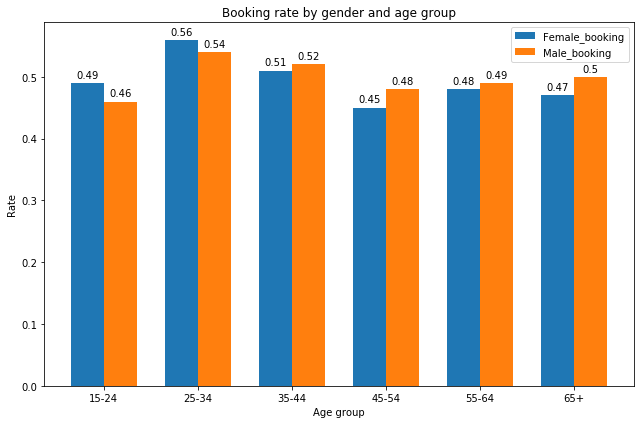

In [699]:
# Bar chart Booking Rate in each Age Group by gender.
labels = train_age_gender_rate.index
Female_booking=train_age_gender_rate['Female_booking_rate']
Male_booking=train_age_gender_rate['Male_booking_rate']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(9,6))

rects1 = ax.bar(x-width/2,Female_booking, width, label='Female_booking')
rects2 = ax.bar(x +width/2, Male_booking, width, label='Male_booking')
ax.set_ylabel('Rate')
ax.set_xlabel('Age group')
ax.set_title('Booking rate by gender and age group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [700]:
# Users without age
train_no_age=train[train['age'].isnull()]
train_no_age.head(2)  

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,n/a
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,n/a


In [701]:
# Bookings by users without age.
countries_no_age=train_no_age.groupby('country_destination')['id'].count().to_frame()\
.rename(columns={'id':'number_users'})
countries_no_age  

,number_users
country_destination,
AU,103
CA,351
DE,210
ES,543
FR,1310
GB,550
IT,799
NDF,67614
NL,160


In [702]:
# Percent from total users without age
countries_no_age['number_users_pct']=countries_no_age['number_users'].apply(lambda x: round((x/len(train_no_age))*100,2 ))
countries_no_age.head(2) 

,number_users,number_users_pct
country_destination,,
AU,103,0.12
CA,351,0.40


In [703]:
i=countries_no_age.loc['NDF']['number_users_pct']
print(f'{i}% of total users without age no makes any order.')

76.84% of total users without age no makes any order.


In [704]:
 # Users without gender
mask=((train['gender']=='-unknown-')|(train['gender']=='OTHER'))
train_no_gender=train[mask]
train_no_gender.head(2) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,n/a
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,35-44


In [705]:
 # Bookings by users without gender
countries_no_gender=train_no_gender.groupby('country_destination')['id'].count().to_frame()\
.rename(columns={'id':'number_users'})
countries_no_gender.head(2) 

,number_users
country_destination,
AU,144
CA,496


In [706]:
 # Percent from total users without gender
countries_no_gender['number_users_pct']=countries_no_gender['number_users']\
.apply(lambda x: round((x/len(train_no_gender))*100,2 ))
countries_no_gender 

,number_users,number_users_pct
country_destination,,
AU,144,0.15
CA,496,0.52
DE,287,0.30
ES,719,0.75
FR,1726,1.80
GB,761,0.79
IT,1045,1.09
NDF,66776,69.58
NL,230,0.24


In [707]:
i=countries_no_gender.loc['NDF']['number_users_pct']
print(f'{i}% of total users without gender no makes any order.')

69.58% of total users without gender no makes any order.


# User Environment Analysis

For analysis, users are divided into two groups:
Those who placed a first order and those who ultimately did not make their first order.

In [708]:
# Adding auxiliary 'booked' column.
train['booked']=train['date_first_booking'].apply(lambda x: 'No' if pd.isnull(x) else 'Yes') 

In [709]:
# Table users that place an order
train_booked=train[train['booked']=='Yes']
train_booked.head(1) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,booked
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,55-64,Yes


In [710]:
# Table users that not place an orde
train_non_booked=train[~(train['booked']=='Yes')]
train_non_booked.head(1) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,booked
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,n/a,No


##  Paid marketing 

In [711]:
# Create table with number users by each affilate channel.
train_affiliate_total=train.groupby('affiliate_channel')['id'].count().to_frame().sort_values('id',ascending=False)\
.rename(columns={'id':'num_users'}) 
train_affiliate_total  # most popular affiliate chanels

,num_users
affiliate_channel,
direct,137727
sem-brand,26045
sem-non-brand,18844
other,8961
seo,8663
api,8167
content,3948
remarketing,1096


In [712]:
# Table with most popular affiliate chanels by rate
train_affiliate_total=train_affiliate_total\
.assign(users_rate=round(train_affiliate_total['num_users']/len(train),2))['users_rate'].to_frame()
train_affiliate_total  

,users_rate
affiliate_channel,
direct,0.65
sem-brand,0.12
sem-non-brand,0.09
other,0.04
seo,0.04
api,0.04
content,0.02
remarketing,0.01


In [713]:
# Grouping by affiliate channel and booked
affiliate_chanel_users=train.groupby(['affiliate_channel','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
affiliate_chanel_users 

num_users
affiliate_channel booked           
api               No           5382
                  Yes          2785
content           No           3390
                  Yes           558
direct            No          78329
                  Yes         59398
other             No           5361
                  Yes          3600
remarketing       No            728
                  Yes           368
sem-brand         No          14951
                  Yes         11094
sem-non-brand     No          11694
                  Yes          7150
seo               No           4708
                  Yes          3955

In [714]:
# Creating  pivot table by affiliate channel and booked
affiliate_chanel_users_pvt=affiliate_chanel_users.pivot_table(index='affiliate_channel'
                                                              ,columns='booked',values='num_users',aggfunc='sum')
affiliate_chanel_users_pvt 

booked,No,Yes
affiliate_channel,,
api,5382,2785
content,3390,558
direct,78329,59398
other,5361,3600
remarketing,728,368
sem-brand,14951,11094
sem-non-brand,11694,7150
seo,4708,3955


In [715]:
# Calculate rate from total
affiliate_chanel_users_pvt[['Yes','No']]\
=normalize(affiliate_chanel_users_pvt[['Yes','No']], axis=1, norm="l1") 

In [716]:
# Round result
affiliate_chanel_users_pvt['Yes']=round(affiliate_chanel_users_pvt['Yes'],2) 

In [717]:
affiliate_chanel_users_pvt=affiliate_chanel_users_pvt['Yes'].to_frame()\
.rename(columns={'Yes':'Booked_rate'}) # rename column

In [718]:
# Channel efficiency by booking rate.
affiliate_chanel_users_pvt 

,Booked_rate
affiliate_channel,
api,0.34
content,0.14
direct,0.43
other,0.40
remarketing,0.34
sem-brand,0.43
sem-non-brand,0.38
seo,0.46


In [719]:
 # Join Tables with channel effectivity and total users rate
channel_effect=train_affiliate_total.merge(affiliate_chanel_users_pvt,how='inner'
                                           ,left_on='affiliate_channel',right_on='affiliate_channel')\
.sort_values('Booked_rate',ascending=False)
channel_effect 

,users_rate,Booked_rate
affiliate_channel,,
seo,0.04,0.46
direct,0.65,0.43
sem-brand,0.12,0.43
other,0.04,0.40
sem-non-brand,0.09,0.38
api,0.04,0.34
remarketing,0.01,0.34
content,0.02,0.14


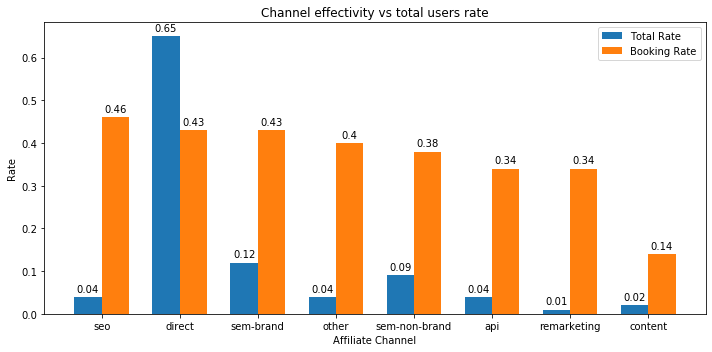

In [720]:
# Bar chart Channel effectivity vs total users rate
labels = channel_effect.index
Total_users_rate=channel_effect['users_rate']
Booking_rate=channel_effect['Booked_rate']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,5))

rects1 = ax.bar(x-width/2,Total_users_rate, width, label='Total Rate')
rects2 = ax.bar(x +width/2, Booking_rate, width, label='Booking Rate')
ax.set_ylabel('Rate')
ax.set_xlabel('Affiliate Channel')
ax.set_title('Channel effectivity vs total users rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

SEO and SEM driildown

In [721]:
# Users who came through SEO only.
mask=train['affiliate_channel']=='seo'
train_seo=train[mask]
train_seo.head(1) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,booked
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,35-44,No


In [722]:
# Grouping by SEO affiliate providers and booked.
train_seo_users=train_seo.groupby(['affiliate_provider','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_seo_users 

num_users
affiliate_provider booked           
baidu              No              4
bing               No            327
                   Yes           162
facebook           No            953
                   Yes           724
google             No           2952
                   Yes          2739
other              No            150
                   Yes           156
yahoo              No            322
                   Yes           174

In [723]:
 # Pivot table number users by SEO affiliate providers and booked.
train_seo_users_pvt=train_seo_users.pivot_table(index='affiliate_provider',columns='booked',values='num_users',aggfunc='sum')\
.fillna(0)
train_seo_users_pvt 

booked,No,Yes
affiliate_provider,,
baidu,4.0,0.0
bing,327.0,162.0
facebook,953.0,724.0
google,2952.0,2739.0
other,150.0,156.0
yahoo,322.0,174.0


In [724]:
train_seo_users_pvt['Total']=train_seo_users_pvt['Yes']+train_seo_users_pvt['No'] # auxiliary 'Total' column

In [725]:
# In order to neutralize accidental providers,
 ##let's filter out that we will only review providers that have expressed at least 5% of users.
mask=train_seo_users_pvt['Total']>(train_seo_users_pvt['Total']).sum()*0.05 
train_seo_users_pvt=train_seo_users_pvt[mask][['No','Yes']]
train_seo_users_pvt

booked,No,Yes
affiliate_provider,,
bing,327.0,162.0
facebook,953.0,724.0
google,2952.0,2739.0
yahoo,322.0,174.0


In [726]:
# Calculate rate from total
train_seo_users_pvt[['Yes','No']]\
=normalize(train_seo_users_pvt[['Yes','No']], axis=1, norm="l1") 

In [727]:
seo_providers=train_seo_users_pvt['Yes'].to_frame().rename(columns={'Yes':'Booked_rate'}) #rename column
seo_providers['Booked_rate']=round(seo_providers['Booked_rate'],2)
seo_providers

,Booked_rate
affiliate_provider,
bing,0.33
facebook,0.43
google,0.48
yahoo,0.35


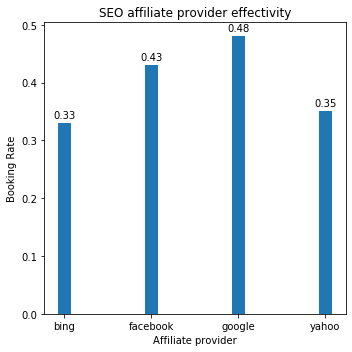

In [728]:
# Bar Chart SEO affiliate provider effectivity
labels = seo_providers.index
Booked_rate=seo_providers['Booked_rate']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x,Booked_rate, width, label='Booked Rate')

ax.set_ylabel('Booking Rate')
ax.set_xlabel('Affiliate provider')
ax.set_title('SEO affiliate provider effectivity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

In [729]:
# Table with users who came through SEM-brand only
mask=train['affiliate_channel']=='sem-brand'
train_sem_brand=train[mask]
train_sem_brand.head(1) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,booked
1025,dlg3a9x97v,2014-04-03,2010-07-12 21:29:24,NaT,MALE,47.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF,45-54,No


In [730]:
# Grouping by SEM-brand affiliate providers
train_sem_brand_users=train_sem_brand.groupby(['affiliate_provider','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_sem_brand_users 

num_users
affiliate_provider booked           
baidu              No              2
                   Yes             5
bing               No            575
                   Yes           375
google             No          14364
                   Yes         10705
naver              No              4
                   Yes             3
other              No              2
                   Yes             3
yandex             No              4
                   Yes             3

In [731]:
 # Pivot table SEM-brand affiliate providers.
train_sem_brand_users_pvt=train_sem_brand_users\
.pivot_table(index='affiliate_provider',columns='booked',values='num_users',aggfunc='sum')\
.fillna(0)
train_sem_brand_users_pvt 

booked,No,Yes
affiliate_provider,,
baidu,2,5
bing,575,375
google,14364,10705
naver,4,3
other,2,3
yandex,4,3


In [732]:
train_sem_brand_users_pvt['Total']=train_sem_brand_users_pvt['Yes']+train_sem_brand_users_pvt['No'] # auxiliary 'Total' column

In [733]:
# In order to neutralize accidental providers,
 ##let's filter out that we will only review providers that have expressed at least 5% of users.
mask=train_sem_brand_users_pvt['Total']>(train_sem_brand_users_pvt['Total']).sum()*0.05 
train_sem_brand_users_pvt=train_sem_brand_users_pvt[mask][['No','Yes']]
train_sem_brand_users_pvt

booked,No,Yes
affiliate_provider,,
google,14364,10705


In [734]:
# Calculate rate from total
train_sem_brand_users_pvt[['Yes','No']]\
=normalize(train_sem_brand_users_pvt[['Yes','No']], axis=1, norm="l1") 

In [735]:
sem_brand_providers=train_sem_brand_users_pvt['Yes'].to_frame().rename(columns={'Yes':'Booked_rate'}) #rename column
sem_brand_providers['Booked_rate']=round(sem_brand_providers['Booked_rate'],2)
sem_brand_providers

,Booked_rate
affiliate_provider,
google,0.43


In [736]:
# Table with users who came through SEM-non-brand only
mask=train['affiliate_channel']=='sem-non-brand'
train_sem__non_brand=train[mask]
train_sem__non_brand.head(1) 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_group,booked
35,ugy4obax11,2010-01-15,2010-01-15 08:27:11,NaT,-unknown-,49.0,basic,0,en,sem-non-brand,google,NaN,Web,Other/Unknown,-unknown-,NDF,45-54,No


In [737]:
# Grouping by SEM-non-brand affiliate providers
train_sem_non_brand_users=train_sem__non_brand.groupby(['affiliate_provider','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_sem_non_brand_users 

num_users
affiliate_provider booked           
baidu              No             13
                   Yes             5
bing               No            593
                   Yes           296
daum               Yes             1
facebook           No              5
google             No          10431
                   Yes          6516
naver              No             30
                   Yes            15
other              No             58
                   Yes            45
vast               No            558
                   Yes           271
yandex             No              6
                   Yes             1

In [738]:
# Pivot table SEM-non-brand affiliate providers
train_sem_non_brand_users_pvt=train_sem_non_brand_users\
.pivot_table(index='affiliate_provider',columns='booked',values='num_users',aggfunc='sum')\
.fillna(0)
train_sem_non_brand_users_pvt 

booked,No,Yes
affiliate_provider,,
baidu,13.0,5.0
bing,593.0,296.0
daum,0.0,1.0
facebook,5.0,0.0
google,10431.0,6516.0
naver,30.0,15.0
other,58.0,45.0
vast,558.0,271.0
yandex,6.0,1.0


In [739]:
train_sem_non_brand_users_pvt['Total']\
=train_sem_non_brand_users_pvt['Yes']+train_sem_non_brand_users_pvt['No'] # auxiliary 'Total column

In [740]:
# In order to neutralize accidental providers,
 ##let's filter out that we will only review providers that have expressed at least 5% of users.
mask=train_sem_non_brand_users_pvt['Total']>(train_sem_non_brand_users_pvt['Total']).sum()*0.05 
train_sem_non_brand_users_pvt=train_sem_non_brand_users_pvt[mask][['No','Yes']]
train_sem_non_brand_users_pvt

booked,No,Yes
affiliate_provider,,
google,10431.0,6516.0


In [741]:
# Calculate rate from total
train_sem_non_brand_users_pvt[['Yes','No']]\
=normalize(train_sem_non_brand_users_pvt[['Yes','No']], axis=1, norm="l1")

In [742]:
sem_non_brand_providers=train_sem_non_brand_users_pvt['Yes'].to_frame().rename(columns={'Yes':'Booked_rate'}) #rename column
sem_non_brand_providers['Booked_rate']=round(sem_non_brand_providers['Booked_rate'],2)
sem_non_brand_providers

,Booked_rate
affiliate_provider,
google,0.38


In [743]:
# Join to make table by affiliate provider rateof all SEM chanels.
sem_all=\
sem_brand_providers.merge(sem_non_brand_providers,how='inner',left_on='affiliate_provider',right_on='affiliate_provider')\
.rename(columns={'Booked_rate_x':'sem_brand','Booked_rate_y':'sem_non_brand'})
sem_all

,sem_brand,sem_non_brand
affiliate_provider,,
google,0.43,0.38


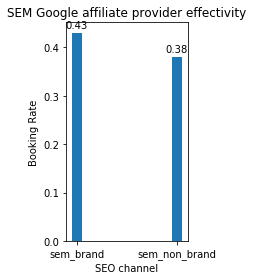

In [744]:
# Bar chart SEM affiliate provider effectivity.
labels = sem_all.transpose().index
Booked_rate=sem_all.transpose()['google']

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars
fig, ax = plt.subplots(figsize=(3,4))

rects1 = ax.bar(x,Booked_rate, width, label='Google provider Booked Rate')

ax.set_ylabel('Booking Rate')
ax.set_xlabel('SEO channel')
ax.set_title('SEM Google affiliate provider effectivity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()


## User's Apps and Devices

In [745]:
# Grouping by Apps
train_app=train.groupby('signup_app')['id'].count().to_frame()\
.rename(columns={'id':'num_users'})\
.sort_values('num_users',ascending=False)
train_app 

,num_users
signup_app,
Web,182717
iOS,19019
Moweb,6261
Android,5454


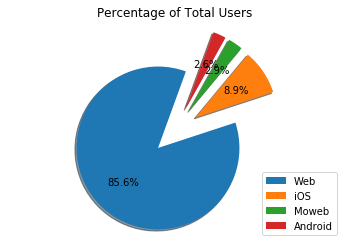

In [746]:
# Pie chart Percentage of Total Users by Apps
p_size = train_app['num_users']
p_labels = train_app.index
p_explode=[0.3 for i in range(len(train_app.index))]
plt.pie(p_size, startangle=70, explode = p_explode,autopct='%1.1f%%', shadow=True)
plt.title('Percentage of Total Users')
plt.axis('equal')
plt.legend(p_labels)
plt.show()

In [747]:
# Grouping by First App and booked.
train_app_booked=train.groupby(['signup_app','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_app_booked 

num_users
signup_app booked           
Android    No           4221
           Yes          1233
Moweb      No           4118
           Yes          2143
Web        No         102696
           Yes         80021
iOS        No          13508
           Yes          5511

In [748]:
# Create pivot table by App and booked.
train_app_booked_pvt=train_app_booked.pivot_table(index='signup_app',columns='booked',values='num_users',aggfunc='sum')
train_app_booked_pvt

booked,No,Yes
signup_app,,
Android,4221,1233
Moweb,4118,2143
Web,102696,80021
iOS,13508,5511


In [749]:
# Calculate rate from total.
train_app_booked_pvt[['Yes','No']]\
=normalize(train_app_booked_pvt[['Yes','No']], axis=1, norm="l1") 

In [750]:
train_app_booked_pvt

booked,No,Yes
signup_app,,
Android,0.773927,0.226073
Moweb,0.657722,0.342278
Web,0.562050,0.437950
iOS,0.710237,0.289763


In [751]:
# Round results.
train_app_booked_pvt['Yes']=round(train_app_booked_pvt['Yes'],2)
train_app_booked_pvt['No']=round(train_app_booked_pvt['No'],2)

In [752]:
train_app_booked_pvt

booked,No,Yes
signup_app,,
Android,0.77,0.23
Moweb,0.66,0.34
Web,0.56,0.44
iOS,0.71,0.29


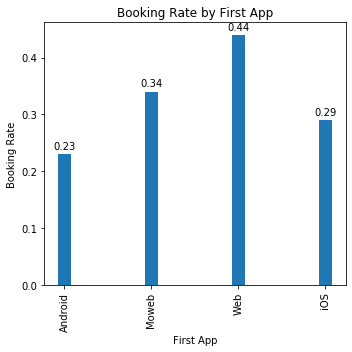

In [753]:
# Bar chart Percent of Total New Users by first devices.
labels = train_app_booked_pvt.index
Booked_rate=train_app_booked_pvt['Yes']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x,Booked_rate, width)

ax.set_ylabel('Booking Rate')
ax.set_xlabel('First App')
ax.set_title('Booking Rate by First App')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
#ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

In [754]:
# Ggrouping by devices
train_devices=train.groupby('first_device_type')['id'].count().to_frame()\
.rename(columns={'id':'num_users'})\
.sort_values('num_users',ascending=False)
train_devices 

,num_users
first_device_type,
Mac Desktop,89600
Windows Desktop,72716
iPhone,20759
iPad,14339
Other/Unknown,10667
Android Phone,2803
Android Tablet,1292
Desktop (Other),1199
SmartPhone (Other),76


In [755]:
# Calculate pct of total users
train_devices['pct_users']=round(train_devices['num_users']/len(train),2) 

In [756]:
train_devices

,num_users,pct_users
first_device_type,,
Mac Desktop,89600,0.42
Windows Desktop,72716,0.34
iPhone,20759,0.10
iPad,14339,0.07
Other/Unknown,10667,0.05
Android Phone,2803,0.01
Android Tablet,1292,0.01
Desktop (Other),1199,0.01
SmartPhone (Other),76,0.00


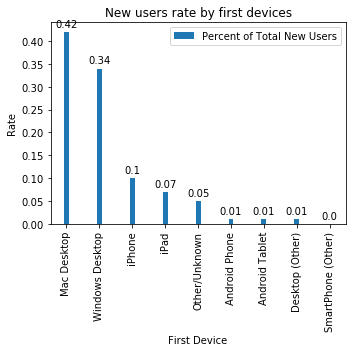

In [757]:
# Bar chart Percent of Total New Users by first devices.
labels = train_devices.index
Booked_rate=train_devices['pct_users']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x,Booked_rate, width, label='Percent of Total New Users')

ax.set_ylabel('Rate')
ax.set_xlabel('First Device')
ax.set_title('New users rate by first devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

## Apps drilldown. 

In [758]:
# Grouping by Singup App and first devices
train_app_device=train.groupby(['signup_app','first_device_type','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_app_device.head(2) 

num_users
signup_app first_device_type booked           
Android    Android Phone     No            962
                             Yes           271

In [759]:
# Create pivot table Singup App and first devices.
train_app_device_pvt=train_app_device\
.pivot_table(index=('signup_app','first_device_type'),columns='booked',values='num_users',aggfunc='sum').fillna(0)
train_app_device_pvt.head(2) 

booked                           No    Yes
signup_app first_device_type              
Android    Android Phone      962.0  271.0
           Android Tablet      75.0   29.0

In [760]:
train_app_device_pvt['Total']=train_app_device_pvt['Yes']+train_app_device_pvt['No'] # auxiliary 'Total' column

In [761]:
train_app_device_pvt.head()

booked                            No    Yes   Total
signup_app first_device_type                       
Android    Android Phone       962.0  271.0  1233.0
           Android Tablet       75.0   29.0   104.0
           Desktop (Other)       4.0    4.0     8.0
           Mac Desktop          39.0   40.0    79.0
           Other/Unknown      3061.0  787.0  3848.0

In [762]:
#In order to neutralize accidental devices,
 ##let's filter out that we will only review devices that have expressed at least 5% of users
app_totals=train_app_device_pvt.reset_index().groupby('signup_app')['Total'].sum().to_frame()
app_totals['5%_app_Total']=app_totals['Total']*0.05

In [763]:
# Create chek table with minimum users to analysis
app_total_rate=app_totals['5%_app_Total'].to_frame() 

In [764]:
app_total_rate

,5%_app_Total
signup_app,
Android,272.70
Moweb,313.05
Web,9135.85
iOS,950.95


In [765]:
# Join App and Devices table with chek table 
train_app_device_chek=\
train_app_device_pvt.reset_index().merge(app_total_rate,how='inner',left_on='signup_app',right_on='signup_app')
train_app_device_chek.head(2)

,signup_app,first_device_type,No,Yes,Total,5%_app_Total
0,Android,Android Phone,962.0,271.0,1233.0,272.7
1,Android,Android Tablet,75.0,29.0,104.0,272.7


In [766]:
# Filtering to 5% rate
mask=train_app_device_chek['Total']>train_app_device_chek['5%_app_Total']
train_app_device_filter_chek=train_app_device_chek[mask]
train_app_device_filter_chek.head(2) 

,signup_app,first_device_type,No,Yes,Total,5%_app_Total
0,Android,Android Phone,962.0,271.0,1233.0,272.7
4,Android,Other/Unknown,3061.0,787.0,3848.0,272.7


In [767]:
# Set two indexes
app_device_filter=train_app_device_filter_chek.set_index(['signup_app','first_device_type'])[['No','Yes']]
app_device_filter.head(2)

No    Yes
signup_app first_device_type               
Android    Android Phone       962.0  271.0
           Other/Unknown      3061.0  787.0

In [768]:
# Calculate rate from total
app_device_filter[['Yes','No']]\
=normalize(app_device_filter[['Yes','No']], axis=1, norm="l1") 

In [769]:
app_device_filter['Yes']=round(app_device_filter['Yes'],2) #round result

In [770]:
app_device_rates=app_device_filter['Yes'].to_frame().rename(columns={'Yes':'Booked_rate'})\
.sort_values(['signup_app','Booked_rate'],ascending=[True,False]) # rename column and sorting values

In [771]:
app_device_rates

Booked_rate
signup_app first_device_type             
Android    Android Phone             0.22
           Other/Unknown             0.20
Moweb      Mac Desktop               0.48
           Windows Desktop           0.44
           iPhone                    0.33
           Android Phone             0.27
           Other/Unknown             0.13
Web        Mac Desktop               0.47
           Windows Desktop           0.41
           iPad                      0.38
iOS        Mac Desktop               0.45
           iPad                      0.36
           iPhone                    0.28
           Other/Unknown             0.04

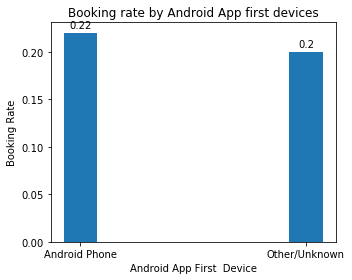

In [772]:
# Bar Chart Booking Rate by Android Devices.
labels = app_device_rates.loc['Android'].index
Booked_rate=app_device_rates.loc['Android']['Booked_rate']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,4))

rects1 = ax.bar(x,Booked_rate, width, label='Booking Rate')

ax.set_ylabel('Booking Rate')
ax.set_xlabel('Android App First  Device')
ax.set_title('Booking rate by Android App first devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
##plt.xticks(rotation=90)
##ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

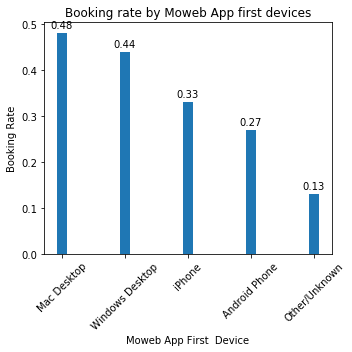

In [773]:
# Bar Chart Booking Rate by Moweb Devices.
labels = app_device_rates.loc['Moweb'].index
Booked_rate=app_device_rates.loc['Moweb']['Booked_rate']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x,Booked_rate, width, label='Booking Rate')

ax.set_ylabel('Booking Rate')
ax.set_xlabel('Moweb App First  Device')
ax.set_title('Booking rate by Moweb App first devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
#ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

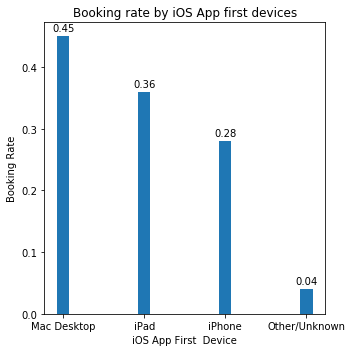

In [774]:
# Bar Chart Booking Rate by iOS Devices.
labels = app_device_rates.loc['iOS'].index
Booked_rate=app_device_rates.loc['iOS']['Booked_rate']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x,Booked_rate, width, label='Booked Rate')

ax.set_ylabel('Booking Rate')
ax.set_xlabel('iOS App First  Device')
ax.set_title('Booking rate by iOS App first devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
##plt.xticks(rotation=90)
##ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

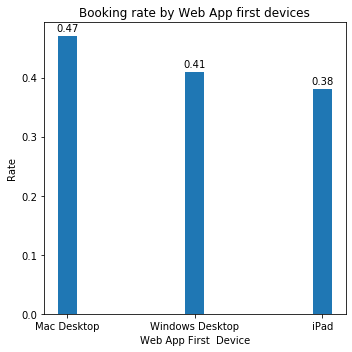

In [775]:
# Bar Chart Booking Rate by Web Devices.
labels = app_device_rates.loc['Web'].index
Booked_rate=app_device_rates.loc['Web']['Booked_rate']

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x,Booked_rate, width, label='Booked Rate')

ax.set_ylabel('Rate')
ax.set_xlabel('Web App First  Device')
ax.set_title('Booking rate by Web App first devices')
ax.set_xticks(x)
ax.set_xticklabels(labels)
##plt.xticks(rotation=90)
#ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
fig.tight_layout()
plt.show()

## Site Analysis

In [776]:
# Create table gruped by site language
train_language=train.groupby('language')['id'].count().to_frame()\
.rename(columns={'id':'num_users'}).sort_values('num_users',ascending=False)
train_language.head(2) 

,num_users
language,
en,206314
zh,1632


In [777]:
train_language=train_language.reset_index() ## reset index to get group by language

In [778]:
# Divided into two groups of English version users or another.
train_language['English_site']=train_language.reset_index()['language'].apply(lambda x: 'Yes' if x=='en' else 'No')

In [779]:
# Grouping by english and non-english site version
train_site=train_language.groupby('English_site')['num_users'].sum().to_frame()
train_site 

,num_users
English_site,
No,7137
Yes,206314


In [780]:
 # Calculate rate of total
train_site['rate']=round(train_site['num_users']/len(train),2) 

In [781]:
Y=train_site['rate']['Yes']*100
N=train_site['rate']['No']*100
print(f'The percent of users using english site version is {Y}%')

The percent of users using english site version is 97.0%


In [782]:
# Divided into two groups of English version users or another.
train['English_site']=train['language'].apply(lambda x: 'English' if x=='en' else 'Other')

In [783]:
# Grouping by site version and booked
train_english_booked=train.groupby(['English_site','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_english_booked 

num_users
English_site booked           
English      No         119650
             Yes         86664
Other        No           4893
             Yes          2244

In [784]:
 # Create pivot table by site version and booked
train_english_booked_pvt=\
train_english_booked.pivot_table(index='English_site',columns='booked',values='num_users',aggfunc='sum')
train_english_booked_pvt 

booked,No,Yes
English_site,,
English,119650,86664
Other,4893,2244


In [785]:
# Calculate rate from total
train_english_booked_pvt[['Yes','No']]\
=normalize(train_english_booked_pvt[['Yes','No']], axis=1, norm="l1") 

In [786]:
train_english_booked_pvt['No']=round(train_english_booked_pvt['No'],2)
train_english_booked_pvt['Yes']=round(train_english_booked_pvt['Yes'],2) 

In [787]:
train_english_booked_pvt

booked,No,Yes
English_site,,
English,0.58,0.42
Other,0.69,0.31


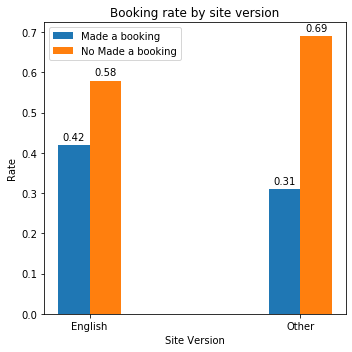

In [788]:
# Bar chart Boking Rate by Site Version.
labels = train_english_booked_pvt.index
y_1=train_english_booked_pvt['Yes']
y_2=train_english_booked_pvt['No']


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(5,5))

rects1 = ax.bar(x-width/2,y_1, width, label='Made a booking')
rects2 = ax.bar(x +width/2, y_2, width, label='No Made a booking')
ax.set_ylabel('Rate')
ax.set_xlabel('Site Version')
ax.set_title('Booking rate by site version')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

## Session 

In [789]:
# Create with specific columns
v_sessions=sessions[['user_id','device_type','secs_elapsed']]
v_sessions.head(2) # sample users sessions table

,user_id,device_type,secs_elapsed
0,d1mm9tcy42,Windows Desktop,319.0
1,d1mm9tcy42,Windows Desktop,67753.0


In [790]:
# Grouping by sum seconds by each user.
sessions_elapsed=v_sessions.groupby('user_id')['secs_elapsed'].sum().to_frame()
sessions_elapsed.head(2) # group by  seconds elapsed

,secs_elapsed
user_id,
00023iyk9l,867896.0
0010k6l0om,586543.0


In [791]:
# Create train table with specific columns.
v_train=train[['id','date_account_created','timestamp_first_active','date_first_booking','country_destination']]
v_train.head(2) 

,id,date_account_created,timestamp_first_active,date_first_booking,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,NDF


In [792]:
# Join train and sessions tables
times_tbl=v_train.merge(sessions_elapsed,how='inner',left_on='id',right_on='user_id')
times_tbl.head(2) # join train and sessions tables

,id,date_account_created,timestamp_first_active,date_first_booking,country_destination,secs_elapsed
0,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,other,3427529.0
1,yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaT,NDF,207842.0


In [793]:
times_tbl['hours_elapsed']=round(times_tbl['secs_elapsed']/3600) #Adding hours spend column

In [794]:
times_tbl.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,country_destination,secs_elapsed,hours_elapsed
0,d1mm9tcy42,2014-01-01,2014-01-01 00:09:36,2014-01-04,other,3427529.0,952.0
1,yo8nz8bqcq,2014-01-01,2014-01-01 00:15:58,NaT,NDF,207842.0,58.0


In [795]:
times_tbl_country=times_tbl.groupby('country_destination') # Grouping by countries

In [796]:
# Aggrigation by number of users and average hours spend
times_tbl_country_agg=times_tbl_country.agg({'id':'count','hours_elapsed':'mean'})

In [797]:
times_tbl_country_agg=times_tbl_country_agg.rename(columns={'id':'num_users','hours_elapsed':'avg_hours_spend'})
times_tbl_country_agg # rename columns

,num_users,avg_hours_spend
country_destination,,
AU,152,473.519737
CA,440,481.920455
DE,250,564.140000
ES,707,548.768034
FR,1435,550.543554
GB,731,554.900137
IT,979,599.502554
NDF,45041,356.541951
NL,247,542.222672


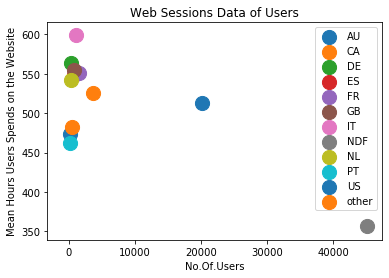

In [798]:
# Chart show Web Sessions Data of Users by country destination.
for i, row in times_tbl_country_agg.iterrows():
    plt.scatter(x=row.num_users, y=row.avg_hours_spend, label=i, s=200)

plt.title('Web Sessions Data of Users')
plt.xlabel('No.Of.Users')
plt.ylabel('Mean Hours Users Spends on the Website')
plt.legend()
plt.show()

The relationship between the likelihood of booking and time spent on the site.

In [799]:
 # Create train table with specific columns
v_train_2=train[['id','booked']]
v_train_2.head(2) # train table with specific columns

,id,booked
0,gxn3p5htnn,No
1,820tgsjxq7,No


In [800]:
# Join sessions table to add secs_elapsed column
times_tbl_2=v_train_2.merge(sessions_elapsed,how='inner',left_on='id',right_on='user_id')

In [801]:
times_tbl_2['hours_elapsed']=round(times_tbl_2['secs_elapsed']/3600) # Adding hours spend column
times_tbl_2.head(2)

,id,booked,secs_elapsed,hours_elapsed
0,d1mm9tcy42,Yes,3427529.0,952.0
1,yo8nz8bqcq,No,207842.0,58.0


In [802]:
# Using 'ntile' method to divide to 10 groups by hours spend. We get 10 groups by ranges.
times_tbl_2['ntile']=pd.qcut(times_tbl_2['hours_elapsed'],10)

In [803]:
times_tbl_2.head(2)

,id,booked,secs_elapsed,hours_elapsed,ntile
0,d1mm9tcy42,Yes,3427529.0,952.0,"(679.0, 1048.0]"
1,yo8nz8bqcq,No,207842.0,58.0,"(47.0, 98.0]"


In [804]:
# Extract midpoint of each group range.
times_tbl_2['mean_ntile'] = times_tbl_2['ntile'].apply(lambda x: x.mid)

In [805]:
times_tbl_2['mean_ntile']=round(times_tbl_2['mean_ntile']) # Round result

In [806]:
times_tbl_2 .head(2)

,id,booked,secs_elapsed,hours_elapsed,ntile,mean_ntile
0,d1mm9tcy42,Yes,3427529.0,952.0,"(679.0, 1048.0]",864.0
1,yo8nz8bqcq,No,207842.0,58.0,"(47.0, 98.0]",72.0


In [807]:
# Grouping by mean hours spend and booked
times_tbl_2_group=times_tbl_2.groupby(['mean_ntile','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
times_tbl_2_group

num_users
mean_ntile booked           
4.0        No           5572
           Yes          2022
28.0       No           5430
           Yes          1781
72.0       No           5163
           Yes          2308
130.0      No           4587
           Yes          2672
202.0      No           4459
           Yes          2917
294.0      No           4300
           Yes          3115
415.0      No           4307
           Yes          3083
581.0      No           3999
           Yes          3346
864.0      No           3854
           Yes          3528
5832.0     No           3370
           Yes          4002

In [808]:
# Create pivot table by mean hours and booked
times_tbl_2_group_pvt=times_tbl_2_group.pivot_table(index='mean_ntile',columns='booked',values='num_users',aggfunc='sum')
times_tbl_2_group_pvt 

booked,No,Yes
mean_ntile,,
4.0,5572,2022
28.0,5430,1781
72.0,5163,2308
130.0,4587,2672
202.0,4459,2917
294.0,4300,3115
415.0,4307,3083
581.0,3999,3346
864.0,3854,3528


In [809]:
# Calculate rate from total
times_tbl_2_group_pvt[['Yes','No']]\
=normalize(times_tbl_2_group_pvt[['Yes','No']], axis=1, norm="l1") 

In [810]:
times_tbl_2_group_pvt['Yes']=round(times_tbl_2_group_pvt['Yes'],2)
times_tbl_2_group_pvt['No']=round(times_tbl_2_group_pvt['No'],2)      #round result
times_tbl_2_group_pvt

booked,No,Yes
mean_ntile,,
4.0,0.73,0.27
28.0,0.75,0.25
72.0,0.69,0.31
130.0,0.63,0.37
202.0,0.60,0.40
294.0,0.58,0.42
415.0,0.58,0.42
581.0,0.54,0.46
864.0,0.52,0.48


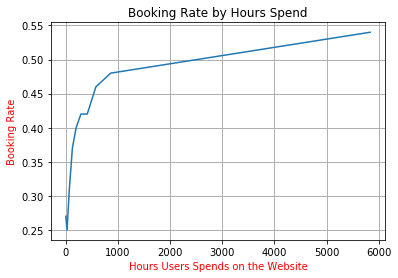

In [811]:
# Line chart show relationship between the likelihood of booking and time spent on the site.
x_axis =times_tbl_2_group_pvt.index
y_axis = times_tbl_2_group_pvt["Yes"]
plt.plot(x_axis, y_axis)

plt.title('Booking Rate by Hours Spend')
plt.grid(True, linewidth=1)
plt.ylabel('Booking Rate', color='red')
plt.xlabel('Hours Users Spends on the Website' , color='red')
#for i,j in zip(x_axis,y_axis):
  #  plt.annotate(str(j),xy=(i,j))
plt.show()

#  Date and Time

To get reliable data and test trends it is necessary to check trends in common range from 01-01-2010 to 30-06-2014.

In [812]:
# Users train table with specific columns.
train_dates=train[['id','date_account_created','timestamp_first_active','date_first_booking','booked','age_group']]
train_dates.head(2) 

,id,date_account_created,timestamp_first_active,date_first_booking,booked,age_group
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,No,n/a
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,No,35-44


In [813]:
# Adding new colums: year, month and weekday
train_dates=train_dates.assign(year_account_created=train_dates['date_account_created'].dt.year,
                  month_account_created=train_dates['date_account_created'].dt.month,
                  weekday_account_created=train_dates['date_account_created'].dt.weekday_name,
                  year_first_active=train_dates['timestamp_first_active'].dt.year,
                  month_first_active=train_dates['timestamp_first_active'].dt.month,
                  weekday_first_active=train_dates['timestamp_first_active'].dt.weekday_name,
                  year_first_booking=train_dates['date_first_booking'].dt.year,
                  month_first_booking=train_dates['date_first_booking'].dt.month,
                  weekday_first_booking=train_dates['date_first_booking'].dt.weekday_name)
train_dates.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,booked,age_group,year_account_created,month_account_created,weekday_account_created,year_first_active,month_first_active,weekday_first_active,year_first_booking,month_first_booking,weekday_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,No,n/a,2010,6,Monday,2009,3,Thursday,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,No,35-44,2011,5,Wednesday,2009,5,Saturday,NaN,NaN,NaN


### Years 

In [814]:
# Table  year and mont first booking
train_dates_first_booking=train_dates[['id','year_first_booking','month_first_booking']]
train_dates_first_booking.head(2)

,id,year_first_booking,month_first_booking
0,gxn3p5htnn,NaN,NaN
1,820tgsjxq7,NaN,NaN


In [815]:
# Grouping by year and month first booking
train_dates_first_booking_group=train_dates_first_booking\
.groupby(['year_first_booking','month_first_booking'])['id'].count().to_frame()
# Reset index before join
train_dates_first_booking_group=train_dates_first_booking_group.reset_index()

In [816]:
# Change type from float to str and create a common column with month and year combination before join.
train_dates_first_booking_group['y_m_first_booking']=\
train_dates_first_booking_group['month_first_booking'].astype(int).astype(str)+\
'-'+train_dates_first_booking_group['year_first_booking'].astype(int).astype(str)

In [817]:
# Grouping by Year+month combination.
train_dates_first_booking_clear=train_dates_first_booking_group[['y_m_first_booking','id']]\
.rename(columns={'id':'booking_num_users','y_m_first_booking':'y_m'})

In [818]:
# Extract year
train_dates_first_booking_clear=\
train_dates_first_booking_clear.assign(Year=train_dates_first_booking_clear['y_m'].str.slice(-4))

In [819]:
train_dates_first_booking_clear.head(2)
# y_m --> common column for join
# booking_nub_users --> number users with booking
# Year --> booking year

,y_m,booking_num_users,Year
0,1-2010,29,2010
1,2-2010,40,2010


In [820]:
# Filter dates to get common range from 01-01-2010 to 30-06-2014.
mask1=train_dates['timestamp_first_active'].between('2010-01-01','2014-06-30')
mask2=train_dates['date_account_created'].between('2010-01-01','2014-06-30')
train_dates_clear=train_dates[mask1&mask2][['id','year_account_created','month_account_created']]
train_dates_clear.head(2)

,id,year_account_created,month_account_created
5,osr2jwljor,2010,1
6,lsw9q7uk0j,2010,1


In [821]:
# Grouping by year and month creared account
train_dates_account_group=train_dates_clear\
.groupby(['year_account_created','month_account_created'])['id'].count().to_frame()
train_dates_account_group=train_dates_account_group.reset_index()

In [822]:
train_dates_account_group.head(2)

,year_account_created,month_account_created,id
0,2010,1,61
1,2010,2,102


In [823]:
# Adding common column befor join with change to str type
train_dates_account_group['y_m_account']=\
train_dates_account_group['month_account_created'].astype(str)+\
'-'+train_dates_account_group['year_account_created'].astype(str)

In [824]:
train_dates_account_group.head(2)

,year_account_created,month_account_created,id,y_m_account
0,2010,1,61,1-2010
1,2010,2,102,2-2010


In [825]:
# Rename columns
train_dates_account_clear=train_dates_account_group.rename(columns={'id':'account_num_users','y_m_account':'y_m'})

In [826]:
train_dates_account_clear.head(2)
# y_m --> common column before join
# account_num_users --> nimber users with account
# year_account_created --> account year
# month_account_created --> account month

,year_account_created,month_account_created,account_num_users,y_m
0,2010,1,61,1-2010
1,2010,2,102,2-2010


In [827]:
# Join with first booking and accounts created tables
account_booking_users=train_dates_account_clear.merge(train_dates_first_booking_clear,how='left',left_on='y_m',right_on='y_m')
account_booking_users=account_booking_users.set_index('y_m')

In [828]:
account_booking_users.head(2)

,year_account_created,month_account_created,account_num_users,booking_num_users,Year
y_m,,,,,
1-2010,2010,1,61,29,2010
2-2010,2010,2,102,40,2010


In [829]:
# Grouping by Year
account_booking_users_year=account_booking_users.groupby('Year')[['account_num_users','booking_num_users']].sum()
account_booking_users_year

,account_num_users,booking_num_users
Year,,
2010,2785,1479
2011,11773,5738
2012,39462,16241
2013,82960,31259
2014,75876,27048


In [830]:
# Adding and round bookin rate column.
account_booking_users_year['booking_rate']=\
round(account_booking_users_year['booking_num_users']/account_booking_users_year['account_num_users'],2)

In [831]:
account_booking_users_year

,account_num_users,booking_num_users,booking_rate
Year,,,
2010,2785,1479,0.53
2011,11773,5738,0.49
2012,39462,16241,0.41
2013,82960,31259,0.38
2014,75876,27048,0.36


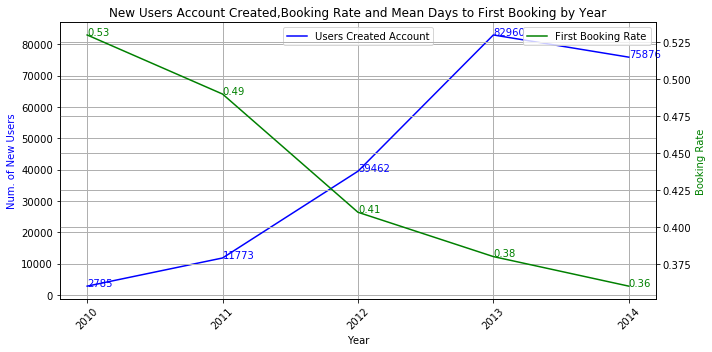

In [832]:
# Line chart with total user with account and booking rate by Year.
x_axis =account_booking_users_year.index
y_axis_1 = account_booking_users_year["account_num_users"]
y_axis_2 = account_booking_users_year["booking_rate"]
#y_axis_3=time_to_booking['days_to_first_booking']


fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
#ax3=ax1.twinx()
#ax3.spines['right'].set_position(('axes', 1.1))

ax1.plot(x_axis, y_axis_1,label='Users Created Account',color='b')
ax2.plot(x_axis, y_axis_2,label='First Booking Rate',color='g')
#ax3.plot(x_axis, y_axis_3,label='Days to First Booking',color='r')

ax1.set_xlabel('Year')
ax1.set_ylabel('Num. of New Users', color='blue')
ax2.set_ylabel('Booking Rate', color='green')
#ax3.set_ylabel('Mean Days to First Booking', color='red')

ax1.grid(True, linewidth=1)
ax2.grid(True, linewidth=1)
#ax3.grid(True, linewidth=1)
plt.title('New Users Account Created,Booking Rate and Mean Days to First Booking by Year')

ax1.set_xticklabels( x_axis,rotation = 45)
plt.tight_layout()
ax1.legend(loc=9)
ax2.legend(loc=1)
#ax3.legend(loc=2)

for i,j,z in zip(x_axis,y_axis_1,y_axis_2):
    ax1.annotate(str(j),xy=(i,j),color='b')
    ax2.annotate(str(z),xy=(i,z),color='g')
    #ax3.annotate(str(f),xy=(i,f),color='r')
plt.show()

### Days from first activity to booking 

In [833]:
# Filter dates to get common range from 01-01-2010 to 30-06-2014.
mask1=train_dates['timestamp_first_active'].between('2010-01-01','2014-06-30')
mask2=train_dates['date_account_created'].between('2010-01-01','2014-06-30')
mask3=train_dates['booked']=='Yes'
train_time_clear=train_dates[mask1&mask2&mask3][['id','timestamp_first_active','date_first_booking','year_first_active']]
train_time_clear.head(2)

,id,timestamp_first_active,date_first_booking,year_first_active
5,osr2jwljor,2010-01-01 21:56:19,2010-01-02,2010
6,lsw9q7uk0j,2010-01-02 01:25:58,2010-01-05,2010


In [834]:
# Calcule days different between first activity and first booking
train_times_diif=train_time_clear.assign(
    first_active_to_booking=np.ceil(((train_time_clear['date_first_booking']-train_time_clear['timestamp_first_active'])\
                                     /np.timedelta64(1,'D'))).astype(int))

In [835]:
train_times_diif.head(2)
# first_active_to_booking --> How many days from user first activity and first booking

,id,timestamp_first_active,date_first_booking,year_first_active,first_active_to_booking
5,osr2jwljor,2010-01-01 21:56:19,2010-01-02,2010,1
6,lsw9q7uk0j,2010-01-02 01:25:58,2010-01-05,2010,3


In [836]:
# Group mean days by year
active_bookin_days=train_times_diif.groupby('year_first_active')['first_active_to_booking'].mean().to_frame()
# Round result 
active_bookin_days['first_active_to_booking']=round(active_bookin_days['first_active_to_booking']).astype(int)
active_bookin_days

,first_active_to_booking
year_first_active,
2010,27
2011,37
2012,43
2013,47
2014,46


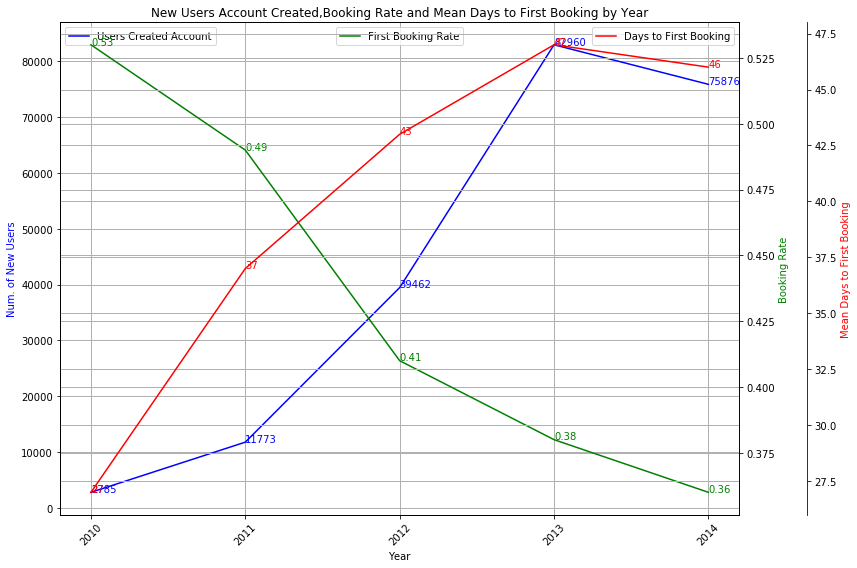

In [837]:
# Line chart with total user with account and booking rate by Year.
x_axis =account_booking_users_year.index
y_axis_1 = account_booking_users_year["account_num_users"]
y_axis_2 = account_booking_users_year["booking_rate"]
y_axis_3 = active_bookin_days['first_active_to_booking']


fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()
ax3=ax1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))

ax1.plot(x_axis, y_axis_1,label='Users Created Account',color='b')
ax2.plot(x_axis, y_axis_2,label='First Booking Rate',color='g')
ax3.plot(x_axis, y_axis_3,label='Days to First Booking',color='r')

ax1.set_xlabel('Year')
ax1.set_ylabel('Num. of New Users', color='blue')
ax2.set_ylabel('Booking Rate', color='green')
ax3.set_ylabel('Mean Days to First Booking', color='red')

ax1.grid(True, linewidth=1)
ax2.grid(True, linewidth=1)
ax3.grid(True, linewidth=1)
plt.title('New Users Account Created,Booking Rate and Mean Days to First Booking by Year')

ax1.set_xticklabels( x_axis,rotation = 45)
plt.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=9)
ax3.legend(loc=1)

for i,j,z,f in zip(x_axis,y_axis_1,y_axis_2,y_axis_3):
    ax1.annotate(str(j),xy=(i,j),color='b')
    ax2.annotate(str(z),xy=(i,z),color='g')
    ax3.annotate(str(f),xy=(i,f),color='r')
plt.show()

### New User quality by Year

In [838]:
# Filter dates to get common range from 01-01-2010 to 30-06-2014.
mask=train_dates['date_account_created'].between('2010-01-01','2014-06-30')
age_dates_clear=train_dates[mask][['id','year_account_created','month_account_created','booked','age_group']]
age_dates_clear.head(2)

,id,year_account_created,month_account_created,booked,age_group
0,gxn3p5htnn,2010,6,No,n/a
1,820tgsjxq7,2011,5,No,35-44


In [839]:
# Grouping by year,age group and booking
train_dates_age_year=age_dates_clear.groupby(['year_account_created','age_group','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_dates_age_year.head(2)

num_users
year_account_created age_group booked           
2010                 15-24     No             13
                               Yes            38

In [840]:
# Create first pivot table year,age group and booking.
train_dates_age_year_pvt=train_dates_age_year.pivot_table(index=['year_account_created','age_group'],
                                                     columns='booked',
                                                     values='num_users',
                                                     aggfunc='sum')
train_dates_age_year_pvt.head(2)

booked                           No  Yes
year_account_created age_group          
2010                 15-24       13   38
                     25-34      245  400

In [841]:
# Calculate rate from total
train_dates_age_year_pvt[['Yes','No']]\
=normalize(train_dates_age_year_pvt[['Yes','No']], axis=1, norm="l1") 

In [842]:
# Round column values
train_dates_age_year_pvt['Yes']=round(train_dates_age_year_pvt['Yes'],2)

In [843]:
# Create second pivot table for make multi line chatrt
train_dates_age_year_pvt_2=\
train_dates_age_year_pvt\
.reset_index()\
.pivot_table(index=train_dates_age_year_pvt.reset_index()['year_account_created'],
             columns='age_group',
             values='Yes',
             aggfunc='sum')
train_dates_age_year_pvt_2

age_group,15-24,25-34,35-44,45-54,55-64,65+,n/a
year_account_created,,,,,,,
2010,0.75,0.62,0.63,0.62,0.62,0.69,0.50
2011,0.53,0.61,0.58,0.54,0.55,0.58,0.49
2012,0.46,0.56,0.54,0.46,0.47,0.47,0.31
2013,0.50,0.58,0.55,0.48,0.49,0.50,0.23
2014,0.51,0.57,0.53,0.51,0.56,0.53,0.19


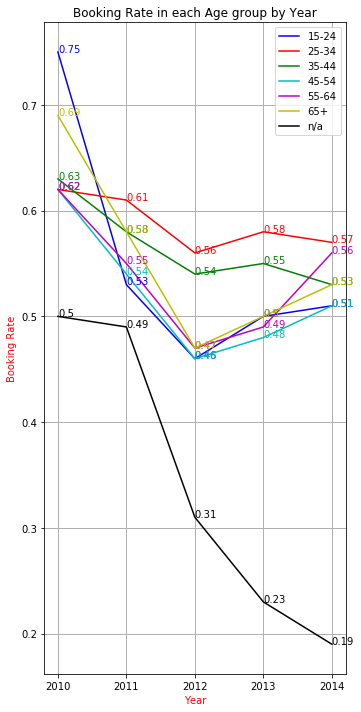

In [844]:
# Chart booking rate by year in each age group
x_axis =['2010','2011','2012','2013','2014']
y_axis_1 = train_dates_age_year_pvt_2["15-24"]
y_axis_2 = train_dates_age_year_pvt_2["25-34"]
y_axis_3 = train_dates_age_year_pvt_2["35-44"]
y_axis_4 = train_dates_age_year_pvt_2["45-54"]
y_axis_5 = train_dates_age_year_pvt_2["55-64"]
y_axis_6 = train_dates_age_year_pvt_2["65+"]
y_axis_7 = train_dates_age_year_pvt_2["n/a"]

fig, ax1 = plt.subplots(figsize=(5, 10))

ax1.plot(x_axis, y_axis_1,label='15-24',color='b')
ax1.plot(x_axis, y_axis_2,label='25-34',color='r')
ax1.plot(x_axis, y_axis_3,label='35-44',color='g')
ax1.plot(x_axis, y_axis_4,label='45-54',color='c')
ax1.plot(x_axis, y_axis_5,label='55-64',color='m')
ax1.plot(x_axis, y_axis_6,label='65+',color='y')
ax1.plot(x_axis, y_axis_7,label='n/a',color='k')


ax1.set_xlabel('Year' , color='red')
ax1.set_ylabel('Booking Rate', color='red')
ax1.grid(True, linewidth=1)
plt.title('Booking Rate in each Age group by Year')

plt.tight_layout()
ax1.legend()

for i,a,b,c,d,f,g,e in zip(x_axis,y_axis_1,y_axis_2,y_axis_3,y_axis_4,y_axis_5,y_axis_6,y_axis_7):
    ax1.annotate(str(a),xy=(i,a),color='b')
    ax1.annotate(str(b),xy=(i,b),color='r')
    ax1.annotate(str(c),xy=(i,c),color='g')
    ax1.annotate(str(d),xy=(i,d),color='c')
    ax1.annotate(str(f),xy=(i,f),color='m')
    ax1.annotate(str(g),xy=(i,g),color='y')
    ax1.annotate(str(e),xy=(i,e),color='k')
plt.show()

In [845]:
# Grouping by year and age group
train_dates_age_year_total=age_dates_clear.groupby(['year_account_created','age_group'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_dates_age_year_total.head(2)

num_users
year_account_created age_group           
2010                 15-24             51
                     25-34            645

In [846]:
# Create pivot table : number users by year and age group
train_dates_age_year_total_pvt=train_dates_age_year_total.pivot_table(index='year_account_created',
                                                                      columns='age_group',
                                                                      values='num_users',
                                                                        aggfunc='sum')
train_dates_age_year_total_pvt

age_group,15-24,25-34,35-44,45-54,55-64,65+,n/a
year_account_created,,,,,,,
2010,51,645,542,224,109,55,1162
2011,328,3191,2350,933,484,211,4278
2012,1384,10957,7174,3248,1624,773,14302
2013,3699,21334,11804,5718,2998,1381,36026
2014,5316,19567,8889,4398,2384,989,34923


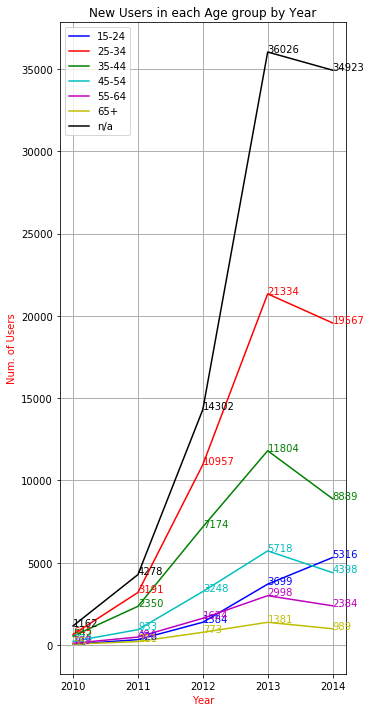

In [847]:
# Chart number of new users by year in each age group
x_axis =['2010','2011','2012','2013','2014']
y_axis_1 = train_dates_age_year_total_pvt["15-24"]
y_axis_2 = train_dates_age_year_total_pvt["25-34"]
y_axis_3 = train_dates_age_year_total_pvt["35-44"]
y_axis_4 = train_dates_age_year_total_pvt["45-54"]
y_axis_5 = train_dates_age_year_total_pvt["55-64"]
y_axis_6 = train_dates_age_year_total_pvt["65+"]
y_axis_7 = train_dates_age_year_total_pvt["n/a"]

fig, ax1 = plt.subplots(figsize=(5, 10))

ax1.plot(x_axis, y_axis_1,label='15-24',color='b')
ax1.plot(x_axis, y_axis_2,label='25-34',color='r')
ax1.plot(x_axis, y_axis_3,label='35-44',color='g')
ax1.plot(x_axis, y_axis_4,label='45-54',color='c')
ax1.plot(x_axis, y_axis_5,label='55-64',color='m')
ax1.plot(x_axis, y_axis_6,label='65+'  ,color='y')
ax1.plot(x_axis, y_axis_7,label='n/a'  ,color='k')


ax1.set_xlabel('Year' , color='red')
ax1.set_ylabel('Num. of Users', color='red')
ax1.grid(True, linewidth=1)
plt.title('New Users in each Age group by Year')

plt.tight_layout()
ax1.legend()

for i,a,b,c,d,f,g,e in zip(x_axis,y_axis_1,y_axis_2,y_axis_3,y_axis_4,y_axis_5,y_axis_6,y_axis_7):
    ax1.annotate(str(a),xy=(i,a),color='b')
    ax1.annotate(str(b),xy=(i,b),color='r')
    ax1.annotate(str(c),xy=(i,c),color='g')
    ax1.annotate(str(d),xy=(i,d),color='c')
    ax1.annotate(str(f),xy=(i,f),color='m')
    ax1.annotate(str(g),xy=(i,g),color='y')
    ax1.annotate(str(e),xy=(i,e),color='k')
plt.show()

### Month 

In [848]:
account_booking_users.head(2)

,year_account_created,month_account_created,account_num_users,booking_num_users,Year
y_m,,,,,
1-2010,2010,1,61,29,2010
2-2010,2010,2,102,40,2010


In [849]:
account_booking_users_month=\
account_booking_users.groupby('month_account_created')[['account_num_users','booking_num_users']].sum()
account_booking_users_month

,account_num_users,booking_num_users
month_account_created,,
1,17495,5997
2,16582,6408
3,20325,8024
4,21867,8534
5,25911,10287
6,26831,10450
7,13832,5485
8,14611,5952
9,15393,5760


In [850]:
account_booking_users_month['booking_rate']=\
round(account_booking_users_month['booking_num_users']/account_booking_users_month['account_num_users'],2)

In [851]:
account_booking_users_month

,account_num_users,booking_num_users,booking_rate
month_account_created,,,
1,17495,5997,0.34
2,16582,6408,0.39
3,20325,8024,0.39
4,21867,8534,0.39
5,25911,10287,0.40
6,26831,10450,0.39
7,13832,5485,0.40
8,14611,5952,0.41
9,15393,5760,0.37


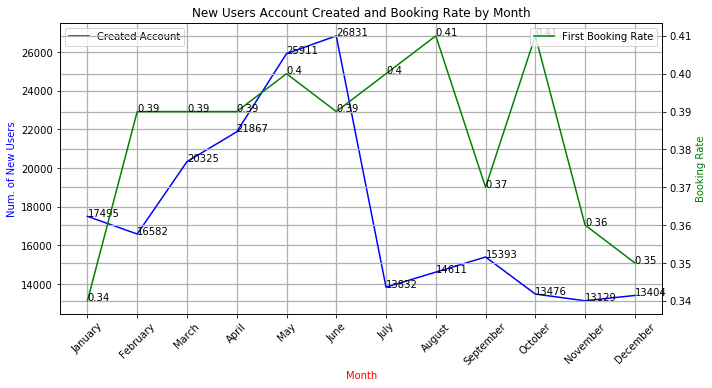

In [852]:
# Line chart Trend new accounts created and booking rate by months
names = ['January', 'February', 'March',
         'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 
         'November', 'December']
x_axis =names
y_axis_1 = account_booking_users_month["account_num_users"]
y_axis_2 = account_booking_users_month["booking_rate"]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax2 = ax1.twinx()
ax1.plot(x_axis, y_axis_1,label='Created Account',color='b')
ax2.plot(x_axis, y_axis_2,label='First Booking Rate',color='g')

ax1.set_xlabel('Month' , color='red')
ax1.set_ylabel('Num. of New Users', color='blue')
ax2.set_ylabel('Booking Rate', color='green')
ax1.grid(True, linewidth=1.25)
ax2.grid(True, linewidth=1.25)
plt.title('New Users Account Created and Booking Rate by Month')


plt.tight_layout()
ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_xticklabels( names,rotation = 45)


for i,j,z in zip(x_axis,y_axis_1,y_axis_2):
    ax1.annotate(str(j),xy=(i,j))
    ax2.annotate(str(z),xy=(i,z))
plt.show()

### Age groups by month 

In [853]:
# Grouping by month and age group
train_dates_age_month=age_dates_clear.groupby(['month_account_created','age_group','booked'])['id'].count().to_frame()\
.rename(columns={'id':'num_users'})
train_dates_age_month.head(2)

num_users
month_account_created age_group booked           
1                     15-24     No            437
                                Yes           435

In [854]:
# Create first pivot table month,age group and booking
train_dates_age_month_pvt=train_dates_age_month.pivot_table(index=['month_account_created','age_group'],
                                                     columns='booked',
                                                     values='num_users',
                                                     aggfunc='sum')
train_dates_age_month_pvt.head(2)

booked                             No   Yes
month_account_created age_group            
1                     15-24       437   435
                      25-34      2029  2675

In [855]:
# Calculate rate from total
train_dates_age_month_pvt[['Yes','No']]\
=normalize(train_dates_age_month_pvt[['Yes','No']], axis=1, norm="l1") 

In [856]:
# Round column values
train_dates_age_month_pvt['Yes']=round(train_dates_age_month_pvt['Yes'],2)

In [857]:
train_dates_age_month_pvt.head(2)

booked                                 No   Yes
month_account_created age_group                
1                     15-24      0.501147  0.50
                      25-34      0.431335  0.57

In [858]:
# Create second pivot table month,age group and booking
train_dates_age_month_pvt_2=\
train_dates_age_month_pvt\
.reset_index()\
.pivot_table(index=train_dates_age_month_pvt.reset_index()['month_account_created'],
             columns='age_group',
             values='Yes',
             aggfunc='sum')
train_dates_age_month_pvt_2

age_group,15-24,25-34,35-44,45-54,55-64,65+,n/a
month_account_created,,,,,,,
1,0.50,0.57,0.52,0.46,0.49,0.59,0.22
2,0.53,0.57,0.56,0.51,0.50,0.52,0.25
3,0.51,0.59,0.55,0.51,0.55,0.54,0.25
4,0.52,0.57,0.55,0.51,0.54,0.53,0.24
5,0.50,0.58,0.56,0.51,0.56,0.54,0.24
6,0.51,0.57,0.54,0.50,0.53,0.48,0.22
7,0.53,0.60,0.53,0.49,0.50,0.53,0.27
8,0.50,0.60,0.57,0.49,0.53,0.48,0.27
9,0.47,0.57,0.55,0.48,0.48,0.52,0.24


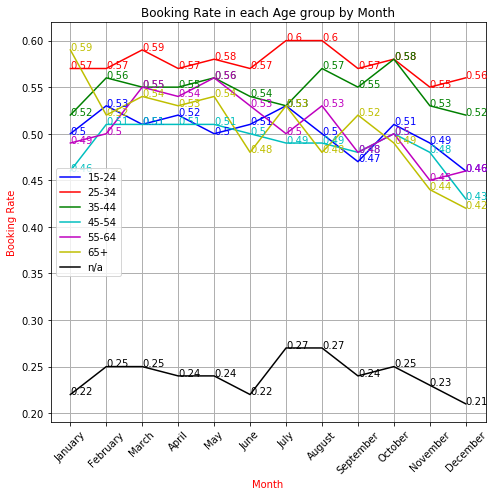

In [859]:
# Chart booking rate by month in each age group
names = ['January', 'February', 'March',
         'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 
         'November', 'December']
x_axis =names
y_axis_1 = train_dates_age_month_pvt_2["15-24"]
y_axis_2 = train_dates_age_month_pvt_2["25-34"]
y_axis_3 = train_dates_age_month_pvt_2["35-44"]
y_axis_4 = train_dates_age_month_pvt_2["45-54"]
y_axis_5 = train_dates_age_month_pvt_2["55-64"]
y_axis_6 = train_dates_age_month_pvt_2["65+"]
y_axis_7 = train_dates_age_month_pvt_2["n/a"]


fig, ax1 = plt.subplots(figsize=(7, 7))

ax1.plot(x_axis, y_axis_1,label='15-24',color='b')
ax1.plot(x_axis, y_axis_2,label='25-34',color='r')
ax1.plot(x_axis, y_axis_3,label='35-44',color='g')
ax1.plot(x_axis, y_axis_4,label='45-54',color='c')
ax1.plot(x_axis, y_axis_5,label='55-64',color='m')
ax1.plot(x_axis, y_axis_6,label='65+',color='y')
ax1.plot(x_axis, y_axis_7,label='n/a',color='k')



ax1.set_xlabel('Month' , color='red')
ax1.set_ylabel('Booking Rate', color='red')
ax1.grid(True, linewidth=1)
plt.title('Booking Rate in each Age group by Month')

ax1.set_xticklabels( names,rotation = 45)
plt.tight_layout()
ax1.legend(loc=6)

for i,a,b,c,d,f,g,e in zip(x_axis,y_axis_1,y_axis_2,y_axis_3,y_axis_4,y_axis_5,y_axis_6,y_axis_7):
    ax1.annotate(str(a),xy=(i,a),color='b')
    ax1.annotate(str(b),xy=(i,b),color='r')
    ax1.annotate(str(c),xy=(i,c),color='g')
    ax1.annotate(str(d),xy=(i,d),color='c')
    ax1.annotate(str(f),xy=(i,f),color='m')
    ax1.annotate(str(g),xy=(i,g),color='y')
    ax1.annotate(str(e),xy=(i,e),color='k')
plt.show()

### Weekday 

In [860]:
# Filter dates to get common range from 01-01-2010 to 30-06-2014.
mask1=train_dates['timestamp_first_active'].between('2010-01-01','2014-06-30')
mask2=train_dates['date_account_created'].between('2010-01-01','2014-06-30')
train_dates_clear_weekday_account=train_dates[mask1&mask2]
train_dates_clear_weekday_account.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,booked,age_group,year_account_created,month_account_created,weekday_account_created,year_first_active,month_first_active,weekday_first_active,year_first_booking,month_first_booking,weekday_first_booking
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,Yes,n/a,2010,1,Friday,2010,1,Friday,2010.0,1.0,Saturday
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,Yes,45-54,2010,1,Saturday,2010,1,Saturday,2010.0,1.0,Tuesday


In [861]:
# Create table by weekday account created
weekday_account=train_dates_clear_weekday_account[['id','weekday_account_created']]
weekday_account.head(2)

,id,weekday_account_created
5,osr2jwljor,Friday
6,lsw9q7uk0j,Saturday


In [862]:
#  Grouping by weekday
weekday_account_group=weekday_account.groupby('weekday_account_created')['id'].count().to_frame()\
.rename(columns={'id':'account_num_users'})
# Reset index before join
weekday_account_group=weekday_account_group.reset_index().rename(columns={'weekday_account_created':'weekday'})
weekday_account_group

,weekday,account_num_users
0,Friday,29741
1,Monday,32270
2,Saturday,24538
3,Sunday,24568
4,Thursday,32570
5,Tuesday,35083
6,Wednesday,34086


In [863]:
# Create table by weekday booking
weekday_booking=train_dates[['id','weekday_first_booking','age_group']]
weekday_booking.head(2)

,id,weekday_first_booking,age_group
0,gxn3p5htnn,NaN,n/a
1,820tgsjxq7,NaN,35-44


In [864]:
# Grouping by weekday booking
weekday_booking_group=weekday_booking.groupby('weekday_first_booking')['id'].count().to_frame()\
.rename(columns={'id':'booking_num_users'})
weekday_booking_group=weekday_booking_group.reset_index().rename(columns={'weekday_first_booking':'weekday'})
weekday_booking_group

,weekday,booking_num_users
0,Friday,13299
1,Monday,12734
2,Saturday,10420
3,Sunday,9845
4,Thursday,13939
5,Tuesday,14297
6,Wednesday,14374


In [865]:
#  Join tables total users and booking users
weekday_account_booking=weekday_account_group.merge(weekday_booking_group,how='inner',left_on='weekday',right_on='weekday')
weekday_account_booking

,weekday,account_num_users,booking_num_users
0,Friday,29741,13299
1,Monday,32270,12734
2,Saturday,24538,10420
3,Sunday,24568,9845
4,Thursday,32570,13939
5,Tuesday,35083,14297
6,Wednesday,34086,14374


In [866]:
# Adding booking rate column
weekday_account_booking['booking_rate']=\
round(weekday_account_booking['booking_num_users']/weekday_account_booking['account_num_users'],2)
weekday_account_booking

,weekday,account_num_users,booking_num_users,booking_rate
0,Friday,29741,13299,0.45
1,Monday,32270,12734,0.39
2,Saturday,24538,10420,0.42
3,Sunday,24568,9845,0.40
4,Thursday,32570,13939,0.43
5,Tuesday,35083,14297,0.41
6,Wednesday,34086,14374,0.42


In [867]:
# Sort weekday names by weekday numbers
names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_account_booking['weekday'] =\
pd.Categorical(weekday_account_booking['weekday'], categories=names, ordered=True)
weekday_account_booking = weekday_account_booking.sort_values('weekday')
weekday_account_booking.set_index('weekday',inplace=True)

In [868]:
weekday_account_booking

,account_num_users,booking_num_users,booking_rate
weekday,,,
Monday,32270,12734,0.39
Tuesday,35083,14297,0.41
Wednesday,34086,14374,0.42
Thursday,32570,13939,0.43
Friday,29741,13299,0.45
Saturday,24538,10420,0.42
Sunday,24568,9845,0.40


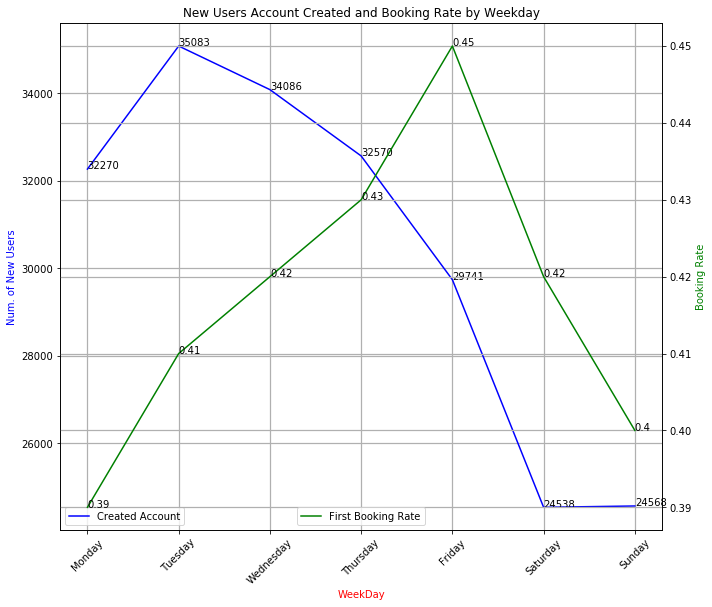

In [869]:
# Line chart Trend new accounts created and booking rate by weekdays
x_axis =weekday_account_booking.index
y_axis_1 = weekday_account_booking["account_num_users"]
y_axis_2 = weekday_account_booking["booking_rate"]

fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()
ax1.plot(x_axis, y_axis_1,label='Created Account',color='b')
ax2.plot(x_axis, y_axis_2,label='First Booking Rate',color='g')

ax1.set_xlabel('WeekDay' , color='red')
ax1.set_ylabel('Num. of New Users', color='blue')
ax2.set_ylabel('Booking Rate', color='green')
ax1.grid(True, linewidth=1.25)
ax2.grid(True, linewidth=1.25)
plt.title('New Users Account Created and Booking Rate by Weekday')

plt.tight_layout()
ax1.legend(loc=3)
ax2.legend(loc=8)
ax1.set_xticklabels( names,rotation = 45)


for i,j,z in zip(x_axis,y_axis_1,y_axis_2):
    ax1.annotate(str(j),xy=(i,j))
    ax2.annotate(str(z),xy=(i,z))
plt.show()

## End 